<a href="https://colab.research.google.com/github/cellstratindra/Colab_notebooks/blob/main/Cellstrat_AIProject_V1_3_Updated(3_Apr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

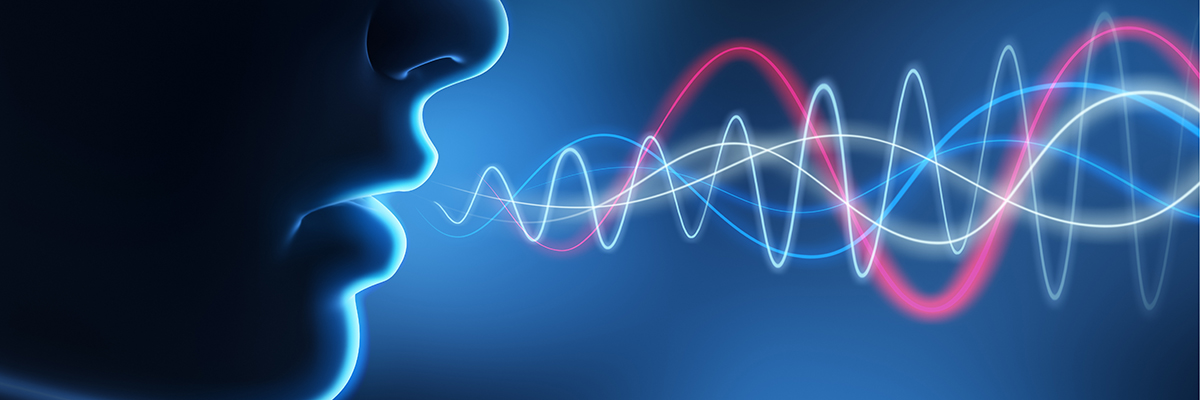

# This is complete test notebook for AudioClassifcation, Emotion Detection and Audio Transcription etc.

## Please try to follow the steps mentioned below to test your data.

# Audio Classification

## First of all, Upload your Data to your Google Drive

## Installation
## Import required Libraries

In [ ]:
# for all libraries
!pip install -qq torch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 torchtext==0.12.0
!pip install -qq speechbrain==0.5.12
!pip install transformers
# pyannote.audio
!pip install -qq pyannote.audio

# for visualization purposes
!pip install -qq ipython==7.34.0

# Nemo model
!pip install git+https://github.com/NVIDIA/NeMo.git

# Install Hydra
!pip install hydra-core

# Pytorch
!pip install torchlibrosa
!pip install pytorch-lightning==1.4.4

!pip install omegaconf -U

!pip install hydra-core --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.58.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-translate 3.8.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-language 2.6.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protob

In [ ]:
import os
import transformers
import numpy as np
from IPython.display import Audio, display
import librosa
import os
import wget
import matplotlib.pyplot as plt

import nemo
import glob

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
## This wil prompt you to autorige you gdrive account to proceed forward
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## List the files or folder on your drive to locate the audio files for testing

In [ ]:
ls /content/gdrive/MyDrive

 Audio_calssification_24th_Feb.ipynb   dataset/
 birds.wav                             school_ambience-7084.mp3
'Colab Notebooks'/


In [ ]:
## Assign your data folder path here: e.x dataset is a folder that contains my audio files. If it doesn't exist it will create
## a folder in your gdrive called Dataset

!mkdir dataset
datapath = "/content/gdrive/MyDrive/dataset"

In [ ]:
## Change the directory path to dataset
os.chdir(datapath)
## Let's display the files
!ls

 chunk_files			      'MIDC Phase 3 Main Road 3.m4a'
'Cnn14_16k_mAP=0.438.pth?download=1'   test_audio.m4a
 EfficientAT			       test_audio.wav
 EfficientAT_Model		       testfile_audio.wav
'MIDC Phase 3 Main Road 3 (1).m4a'     whisper


## Upload your audio file to gdrive now

In [ ]:
## If you have already uploaded file just click on cancel upload
from google.colab import files
uploaded = files.upload()

Saving vocals.wav to vocals.wav


## Let's covert the files to .wav

In [ ]:
!ffmpeg -i /content/gdrive/MyDrive/dataset/test_audio.m4a test_audio.wav


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

## Download the model on your Drive

In [ ]:
!git clone https://github.com/fschmid56/EfficientAT.git

fatal: destination path 'EfficientAT' already exists and is not an empty directory.


## Let's go to that directory


In [ ]:
cd "/content/gdrive/MyDrive/dataset/EfficientAT"

/content/gdrive/MyDrive/dataset/EfficientAT


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.2/890.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

## Download a sample call before checking the model with your data

In [ ]:
!wget "https://zenodo.org/record/3987831/files/Cnn14_16k_mAP%3D0.438.pth?download=1"

--2023-03-17 15:25:32--  https://zenodo.org/record/3987831/files/Cnn14_16k_mAP%3D0.438.pth?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358668570 (342M) [application/octet-stream]
Saving to: ‘Cnn14_16k_mAP=0.438.pth?download=1.1’

Cnn14_16k_mAP=0.438 100%[===================>] 342.05M  3.02MB/s    in 1m 42s  

2023-03-17 15:27:16 (3.34 MB/s) - ‘Cnn14_16k_mAP=0.438.pth?download=1.1’ saved [358668570/358668570]



In [ ]:
!pip install torchlibrosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## List files

In [ ]:
!ls

 chunk_files				 frame-205.wav	 frame-280.wav
'Cnn14_16k_mAP=0.438.pth?download=1'	 frame-206.wav	 frame-281.wav
'Cnn14_16k_mAP=0.438.pth?download=1.1'	 frame-207.wav	 frame-282.wav
 complexity.py				 frame-208.wav	 frame-283.wav
 datasets				 frame-209.wav	 frame-284.wav
 ex_audioset.py				 frame-20.wav	 frame-285.wav
 ex_dcase20.py				 frame-210.wav	 frame-286.wav
 ex_esc50.py				 frame-211.wav	 frame-287.wav
 ex_fsd50k.py				 frame-212.wav	 frame-288.wav
 frame-0.wav				 frame-213.wav	 frame-289.wav
 frame-100.wav				 frame-214.wav	 frame-28.wav
 frame-101.wav				 frame-215.wav	 frame-290.wav
 frame-102.wav				 frame-216.wav	 frame-291.wav
 frame-103.wav				 frame-217.wav	 frame-292.wav
 frame-104.wav				 frame-218.wav	 frame-293.wav
 frame-105.wav				 frame-219.wav	 frame-294.wav
 frame-106.wav				 frame-21.wav	 frame-295.wav
 frame-107.wav				 frame-220.wav	 frame-296.wav
 frame-108.wav				 frame-221.wav	 frame-297.wav
 frame-109.wav				 frame-222.wav	 frame-298.wav
 frame-10.wav	

## Let's donwload the pre-trained model

In [ ]:
from models.MobileNetV3 import get_model
model = get_model(width_mult=1.0, pretrained_name="mn10_as")

MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False

## Generate Inference from a sample Audio

In [ ]:
## I am using "Birds.wav" file. You can use any sample.
!python inference.py --cuda --model_name=mn10_as --audio_path="/content/gdrive/MyDrive/birds.wav"


/usr/local/lib/python3.9/dist-packages/torchvision/ops/misc.py:120: UserWarning: Don't use ConvNormActivation directly, please use Conv2dNormActivation and Conv3dNormActivation instead.
  warnings.warn(
MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_run

# Let's Do with real calls

In [ ]:
!pwd

/content/gdrive/MyDrive/dataset/EfficientAT


In [ ]:
## I am using "Birds.wav" file. You can use any sample.
## Upload your call
## It will convert it into a wav file
## It will split it into multiple chunks
## !ffmpeg -i "Give your file name here e.x birds.wav" -f segment -segment_time 5 -c copy frame-%d.wav
os.chdir("/content/gdrive/MyDrive/dataset/")
!mkdir chunk_files
os.chdir("/content/gdrive/MyDrive/dataset/chunk_files")
!pwd

mkdir: cannot create directory ‘chunk_files’: File exists
/content/gdrive/MyDrive/dataset/chunk_files


In [ ]:
## This command will create chunks of 60 seconds audios from your sample file
!ffmpeg -i /content/gdrive/MyDrive/dataset/testfile_audio.wav -f segment -segment_time 60 -c copy frame-%d.wav

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

## Let's iterate through the list of calls and find classification of each

In [ ]:
os.chdir("/content/gdrive/MyDrive/dataset/EfficientAT")
!pwd
!ls

/content/gdrive/MyDrive/dataset/EfficientAT
 chunk_files				 frame-205.wav	 frame-280.wav
'Cnn14_16k_mAP=0.438.pth?download=1'	 frame-206.wav	 frame-281.wav
'Cnn14_16k_mAP=0.438.pth?download=1.1'	 frame-207.wav	 frame-282.wav
 complexity.py				 frame-208.wav	 frame-283.wav
 datasets				 frame-209.wav	 frame-284.wav
 ex_audioset.py				 frame-20.wav	 frame-285.wav
 ex_dcase20.py				 frame-210.wav	 frame-286.wav
 ex_esc50.py				 frame-211.wav	 frame-287.wav
 ex_fsd50k.py				 frame-212.wav	 frame-288.wav
 frame-0.wav				 frame-213.wav	 frame-289.wav
 frame-100.wav				 frame-214.wav	 frame-28.wav
 frame-101.wav				 frame-215.wav	 frame-290.wav
 frame-102.wav				 frame-216.wav	 frame-291.wav
 frame-103.wav				 frame-217.wav	 frame-292.wav
 frame-104.wav				 frame-218.wav	 frame-293.wav
 frame-105.wav				 frame-219.wav	 frame-294.wav
 frame-106.wav				 frame-21.wav	 frame-295.wav
 frame-107.wav				 frame-220.wav	 frame-296.wav
 frame-108.wav				 frame-221.wav	 frame-297.wav
 frame-109.wav				

## Currently you can try with single file generated one at a time to test the classification results.

In [ ]:
import glob
#list_files = []
#your_file_path = "/content/gdrive/MyDrive/dataset/chunk_files/frame-0.wav"

#for file in glob.glob(path):
   #list_files.append(file)
   #print(list_files)

!python inference.py --cuda --model_name=mn40_as_ext --audio_path='/content/gdrive/MyDrive/dataset/chunk_files/frame-0.wav'



/usr/local/lib/python3.9/dist-packages/torchvision/ops/misc.py:120: UserWarning: Don't use ConvNormActivation directly, please use Conv2dNormActivation and Conv3dNormActivation instead.
  warnings.warn(
MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_run

## Transcription Model Whisper

## Let's download the Whisper model

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/dataset/')
!mkdir whisper
os.chdir('/content/gdrive/MyDrive/dataset/whisper/')

mkdir: cannot create directory ‘whisper’: File exists


In [ ]:
!pip install git+https://github.com/openai/whisper.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-xiytlz9x
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-xiytlz9x
  Resolved https://github.com/openai/whisper.git to commit 6dea21fd7f7253bfe450f1e2512a0fe47ee2d258
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20230314-py3-none-any.whl size=796926 sha256

In [ ]:
## load streaming dataset and read first audio sample
## Sample
## This will take some time if you are running for the first time
!whisper  "/content/gdrive/MyDrive/dataset/chunk_files/frame-0.wav"

100%|███████████████████████████████████████| 461M/461M [00:07<00:00, 60.5MiB/s]
/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: English
[00:00.000 --> 00:07.520]  notebook in colab right so that's next four days let's do that and i will try to capture
[00:07.520 --> 00:14.000]  a lot of this intelligence in the solution doc and continue to collaborate with mrigid and when
[00:14.000 --> 00:20.320]  niraj comes back from undead then we'll we'll continue the the create ml and other stuff right so
[00:21.120 --> 00:27.040]  yeah when you can set up the tasks so that i can i think the click up tasks will help
[00:27.040 --> 00:33.520]  prioritize the activities the room yes yes absolutely i'm setting it up right now
[00:35.200 --> 0

## Run the below cell if you wanna run on all the call chunks

In [ ]:
import whisper
import glob
path = "/content/gdrive/MyDrive/dataset/chunk_files/*.*"
model = whisper.load_model("base")
for file in glob.glob(path):
  result = model.transcribe(file)

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 114MiB/s]
[NeMo W 2023-03-17 15:50:47 nemo_logging:349] /usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
      warnings.warn("FP16 is not supported on CPU; using FP32 instead")
    
[NeMo W 2023-03-17 15:51:16 nemo_logging:349] /usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
      warnings.warn("FP16 is not supported on CPU; using FP32 instead")
    
[NeMo W 2023-03-17 15:51:42 nemo_logging:349] /usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
      warnings.warn("FP16 is not supported on CPU; using FP32 instead")
    
[NeMo W 2023-03-17 15:52:03 nemo_logging:349] /usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 

# Speaker Diarization


### Automatic Speech Recognition with Speaker Diarization


In the second example where a speaker label is artificially flipped, we can see that WER has not been changed while cpWER has been changed. This shows that the diarization result is degraded while the ASR result keeps its accuracy.

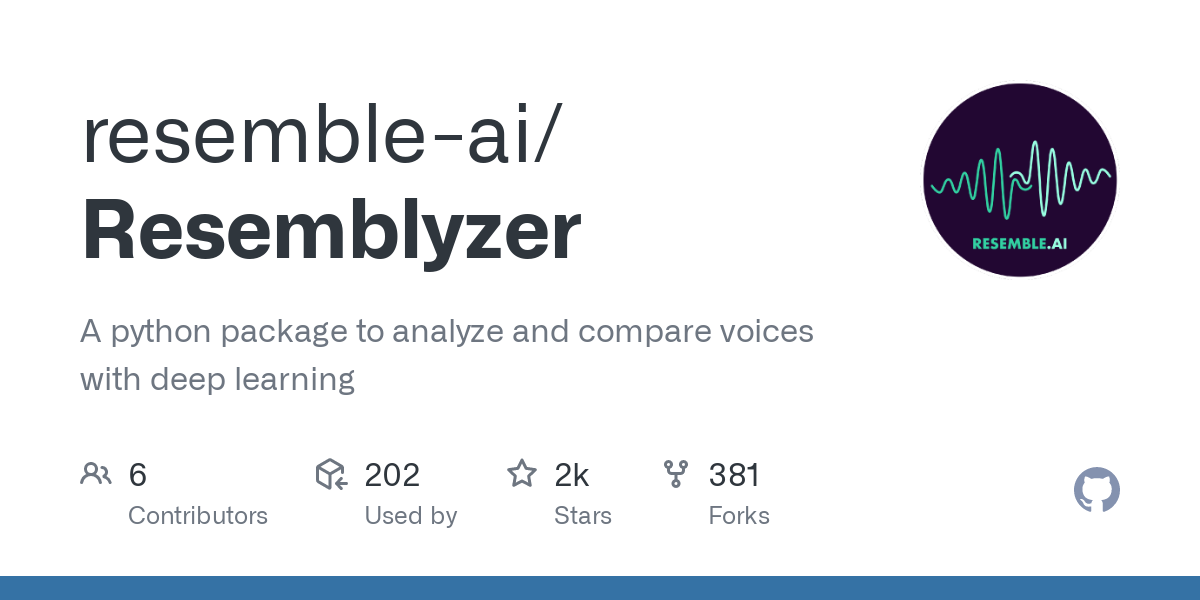

In [ ]:
## Resemblyzer Installation
!git clone https://github.com/resemble-ai/Resemblyzer.git

# Whisper Install if not already Installed
!pip install git+https://github.com/openai/whisper.git 

# Dependency Installation
!pip3 install spectralcluster
!pip3 install pydub
!pip install umap-learn
!pip3 install webrtcvad
!sudo apt-get install libportaudio2
!pip install sounddevice

fatal: destination path 'Resemblyzer' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=bf38bd1992a225f68d1d320270532de7a321e98674bf8d5f6cffa73f730808a8
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=46042e5cf58e5b0f8f

In [ ]:
cd Resemblyzer

/content/gdrive/MyDrive/dataset/whisper/Resemblyzer


## You can skip this part if you want , however this for using the pyannote player and we will use the same later as model.

## Upload a Audio File

In [ ]:
from IPython.display import Audio, display
from google.colab import files
uploades = files.upload()
uploades = "/content/Resemblyzer/audio_data/frame-0.wav"
display(Audio(uploades, autoplay=True))

Saving vocals.wav to vocals.wav


ValueError: ignored

In [ ]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("/content/frame-0.wav")
print(result["text"])

 notebook in colab. So that's next part is let's do that and I will try to capture what of this intelligence in the solution doc and continue to collaborate with the industry and when the rich comes back from a death then we will continue the the create ML and other stuff right so yeah and you can set up the task so that I can I think the click up tasks will help provide ties the activities the yes yes absolutely I'm setting it up right now. So in which it any other thoughts comments or action items in your mind? No I think let's focus on these two first because let's not I mean I don't want to divers and multiple things but yeah I was anyway one idea that I was working on this emotion detection model also figuring out but yeah I'll park that for now yeah.


In [ ]:
from resemblyzer import preprocess_wav, VoiceEncoder
from demo_utils import *
from pathlib import Path
import whisper

model = whisper.load_model("base")

# DEMO 02: we'll show how this similarity measure can be used to perform speaker diarization
# (telling who is speaking when in a recording).


## Get reference audios
# Load the interview audio from disk
# Source for the interview: https://www.youtube.com/watch?v=X2zqiX6yL3I
wav_fpath = Path("audio_data", "frame-0.wav")
wav = preprocess_wav(wav_fpath)

# Cut some segments from single speakers as reference audio
segments = [[0, 0.20], [0.21, 0.25], [0.26, 0.29],[0.30, 0.39], [0.40, 0.41]]
speaker_names = ["Vivek", "Neeraj", "Vivek", "Tarun", "Indrajit"]
speaker_wavs = [wav[int(s[0] * sampling_rate):int(s[1] * sampling_rate)] for s in segments]
  
    
## Compare speaker embeds to the continuous embedding of the interview
# Derive a continuous embedding of the interview. We put a rate of 16, meaning that an 
# embedding is generated every 0.0625 seconds. It is good to have a higher rate for speaker 
# diarization, but it is not so useful for when you only need a summary embedding of the 
# entire utterance. A rate of 2 would have been enough, but 16 is nice for the sake of the 
# demonstration. 
# We'll exceptionally force to run this on CPU, because it uses a lot of RAM and most GPUs 
# won't have enough. There's a speed drawback, but it remains reasonable.
encoder = VoiceEncoder("cuda")
print("Running the continuous embedding on cuda, this might take a while...")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)


# Get the continuous similarity for every speaker. It amounts to a dot product between the 
# embedding of the speaker and the continuous embedding of the interview
speaker_embeds = [encoder.embed_utterance(speaker_wav) for speaker_wav in speaker_wavs]
speaker_transcriptions = [model.transcribe(speaker_wav) for speaker_wav in speaker_wavs]

similarity_dict = {name: cont_embeds @ speaker_embed for name, speaker_embed in 
                   zip(speaker_names, speaker_embeds)}

#print(speaker_names,speaker_transcriptions)
speaker_dictionary = dict(zip(speaker_names, speaker_transcriptions))


#print(speaker_dictionary)
print("\n".join("{}\t{}".format(k, v) for k, v in speaker_dictionary.items()))


Loaded the voice encoder model on cuda in 0.01 seconds.
Running the continuous embedding on cuda, this might take a while...
Vivek	{'text': ' you', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 2.0, 'text': ' you', 'tokens': [50364, 291, 50464], 'temperature': 0.0, 'avg_logprob': -0.9487971067428589, 'compression_ratio': 0.2727272727272727, 'no_speech_prob': 0.940033495426178}], 'language': 'en'}
Neeraj	{'text': ' you', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 2.0, 'text': ' you', 'tokens': [50364, 291, 50464], 'temperature': 0.0, 'avg_logprob': -0.9488651156425476, 'compression_ratio': 0.2727272727272727, 'no_speech_prob': 0.9481580257415771}], 'language': 'en'}
Tarun	{'text': ' Thank you.', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 0.5, 'text': ' Thank you.', 'tokens': [50364, 1044, 291, 13, 50389], 'temperature': 0.0, 'avg_logprob': -0.8582733472188314, 'compression_ratio': 0.5555555555555556, 'no_speech_prob': 0.9051153063774109}], 'language': 'e

In [ ]:
from resemblyzer import preprocess_wav, VoiceEncoder
from demo_utils import *
from pathlib import Path
import whisper

model = whisper.load_model("base")


# DEMO 02: we'll show how this similarity measure can be used to perform speaker diarization
# (telling who is speaking when in a recording).


## Get reference audios
# Load the interview audio from disk
# Source for the interview: https://www.youtube.com/watch?v=X2zqiX6yL3I
wav_fpath = Path("audio_data", "X2zqiX6yL3I.mp3")
wav = preprocess_wav(wav_fpath)

# Cut some segments from single speakers as reference audio
segments = [[0, 5.5], [6.5, 12], [17, 25]]
speaker_names = ["Kyle Gass", "Sean Evans", "Jack Black"]
speaker_wavs = [wav[int(s[0] * sampling_rate):int(s[1] * sampling_rate)] for s in segments]
  
    
## Compare speaker embeds to the continuous embedding of the interview
# Derive a continuous embedding of the interview. We put a rate of 16, meaning that an 
# embedding is generated every 0.0625 seconds. It is good to have a higher rate for speaker 
# diarization, but it is not so useful for when you only need a summary embedding of the 
# entire utterance. A rate of 2 would have been enough, but 16 is nice for the sake of the 
# demonstration. 
# We'll exceptionally force to run this on CPU, because it uses a lot of RAM and most GPUs 
# won't have enough. There's a speed drawback, but it remains reasonable.
encoder = VoiceEncoder("cpu")
print("Running the continuous embedding on cpu, this might take a while...")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)



# Get the continuous similarity for every speaker. It amounts to a dot product between the 
# embedding of the speaker and the continuous embedding of the interview
speaker_embeds = [encoder.embed_utterance(speaker_wav) for speaker_wav in speaker_wavs]
speaker_transcriptions = [model.transcribe(speaker_wav) for speaker_wav in speaker_wavs]

similarity_dict = {name: cont_embeds @ speaker_embed for name, speaker_embed in 
                   zip(speaker_names, speaker_embeds)}

#print(speaker_names,speaker_transcriptions)
speaker_dictionary = dict(zip(speaker_names, speaker_transcriptions))


#print(speaker_dictionary)
print("\n".join("{}\t{}".format(k, v) for k, v in speaker_dictionary.items()))


Loaded the voice encoder model on cpu in 0.01 seconds.
Running the continuous embedding on cpu, this might take a while...
Kyle Gass	{'text': ' Well, I loved Bernie a lot. I think that was really some great performance.', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 2.0, 'text': ' Well, I loved Bernie a lot.', 'tokens': [50364, 1042, 11, 286, 4333, 22426, 257, 688, 13, 50464], 'temperature': 0.0, 'avg_logprob': -0.4685419256036932, 'compression_ratio': 0.974025974025974, 'no_speech_prob': 0.02783505991101265}, {'id': 1, 'seek': 0, 'start': 2.0, 'end': 5.5, 'text': ' I think that was really some great performance.', 'tokens': [50464, 286, 519, 300, 390, 534, 512, 869, 3389, 13, 50639], 'temperature': 0.0, 'avg_logprob': -0.4685419256036932, 'compression_ratio': 0.974025974025974, 'no_speech_prob': 0.02783505991101265}], 'language': 'en'}
Sean Evans	{'text': " Jack, what's your favorite episode of guitar rings? The internet guitar tutorial series hosted by Kyle.", 'segments': [

# Pyaanote Model

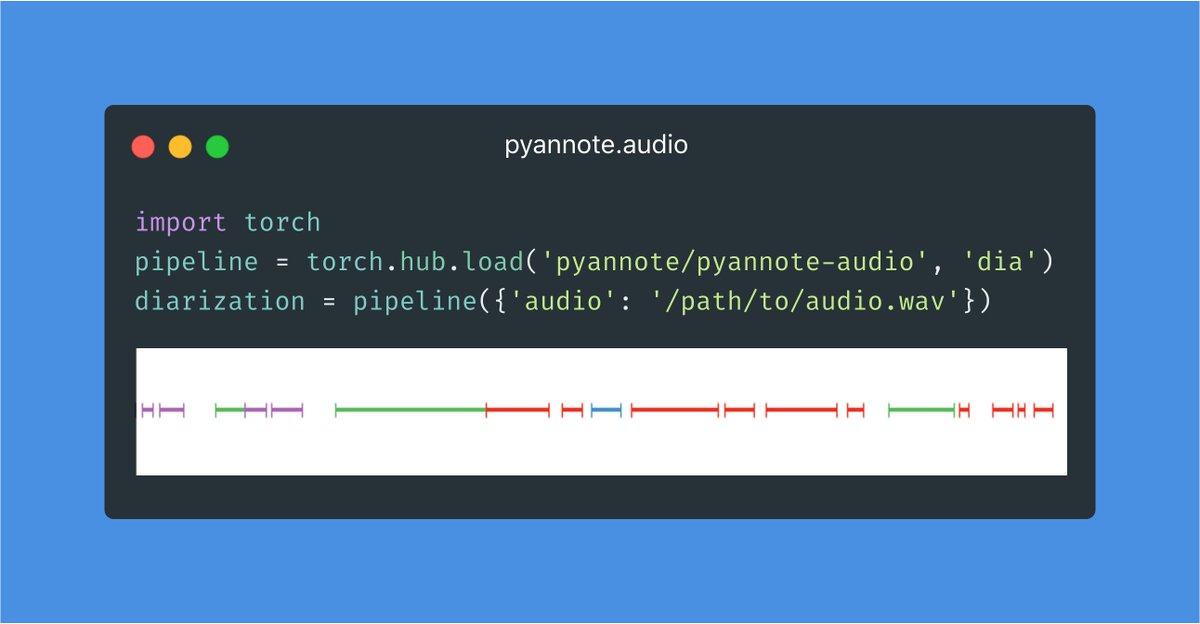



# Whisper's transcription plus Pyannote's Diarization 

Andrej Karpathy [suggested](https://twitter.com/karpathy/status/1574476200801538048?s=20&t=s5IMMXOYjBI6-91dib6w8g) training a classifier on top of  OpenAI [Whisper](https://openai.com/blog/whisper/) model features to identify the speaker, so we can visualize the speaker in the transcript. But, as [pointed out](https://twitter.com/tarantulae/status/1574493613362388992?s=20&t=s5IMMXOYjBI6-91dib6w8g) by Christian Perone, it seems that features from whisper wouldn't be that great for speaker recognition as its main objective is basically to ignore speaker differences.

In the following, I use [**`pyannote-audio`**](https://github.com/pyannote/pyannote-audio), a speaker diarization toolkit by Hervé Bredin, to identify the speakers, and then match it with the transcriptions of Whispr, linked to the video. The input can be YouTube or an video/audio file (also on Google Drive). I try it on a part of an [interview](https://youtu.be/NSp2fEQ6wyA) with Freeman Dyson. Check the result [**here**](https://majdoddin.github.io/dyson.html).

To make it easier to match the transcriptions to diarizations by speaker change, Sarah Kaiser [suggested](https://github.com/openai/whisper/discussions/264#discussioncomment-3825375) runnnig the pyannote.audio first and  then just running whisper on the split-by-speaker chunks. 
For sake of performance (and transcription quality?), we attach the audio segements into a single audio file with a silent spacer as a seperator, and run whisper on it. Enjoy it!

(For sake of performance , I also tried attaching the audio segements into a single audio file with a silent -or beep- spacer as a seperator, and run whisper on it see it on [colab](https://colab.research.google.com/drive/1HuvcY4tkTHPDzcwyVH77LCh_m8tP-Qet?usp=sharing). It [works](https://majdoddin.github.io/lexicap.html) on some audio, and fails on some (Dyson's Interview). The problem is, whisper does not reliably make a timestap on a spacer. See the discussions [#139](https://github.com/openai/whisper/discussions/139) and [#29](https://github.com/openai/whisper/discussions/29))

The Markdown form used below is from [@ArthurFDLR](https://github.com/ArthurFDLR/whisper-youtube/).   

In [ ]:
from google.colab import drive
from pathlib import Path

drive_mount_path = Path("/content/drive")
drive.mount(str(drive_mount_path))
drive_mount_path /= "MyDrive"

Mounted at /content/drive


## Please esnure you change the Video/Audio File path

In [ ]:
#@markdown Enter the URL of the YouTube video, or the path to the video/audio file you want to transcribe, give the output path, and run the cell. HTML file is generated only for YouTube videos

Source = 'File (Google Drive)' #@param ['Youtube', 'File (Google Drive)']
#@markdown ---
#@markdown #### **Youtube video**
video_url = "https://youtu.be/NSp2fEQ6wyA" #@param {type:"string"}
#store_audio = True #@param {type:"boolean"}
#@markdown ---
#@markdown #### **Google Drive video or audio (mp4, wav)**
video_path = "/content/drive/MyDrive/dataset/vocals.wav" #@param {type:"string"}
#@markdown ---
output_path = "/content/" #@param {type:"string"}
output_path = str(Path(output_path))
#@markdown ---
#@markdown **Run this cell again if you change the video.**


In [ ]:
Path(output_path).mkdir(parents=True, exist_ok=True)
%cd {output_path}
video_title = ""
video_id = ""

/content


In [ ]:
if Source == "Youtube":
  !pip install -U yt-dlp

In [ ]:
if Source == "Youtube":
  !wget -O - -q  https://github.com/yt-dlp/FFmpeg-Builds/releases/download/latest/ffmpeg-master-latest-linux64-gpl.tar.xz | xz -qdc| tar -x

In [ ]:
#Getting video info
if Source == "Youtube":
  from yt_dlp import YoutubeDL
  with YoutubeDL() as ydl: 
    info_dict = ydl.extract_info(video_url, download=False)
    video_title = info_dict.get('title', None)
    video_id = info_dict.get('id', None)
    print("Title: " + video_title) # <= Here, you got the video title


In [ ]:
if Source == "Youtube":
  !yt-dlp -xv --ffmpeg-location ffmpeg-master-latest-linux64-gpl/bin --audio-format wav  -o "{str(output_path) + '/'}input_indra.wav" -- {video_url}

## Required only if you running it on Youtube Videos

In [ ]:
if Source == 'File (Google Drive)':
    !ffmpeg -i {repr(video_path)} -vn -acodec pcm_s16le -ar 16000 -ac 1 input_indra.wav  

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

## Prepending a spacer

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[`pyannote.audio`](https://github.com/pyannote/pyannote-audio) is an open-source toolkit written in Python for **speaker diarization**. 

Based on [`PyTorch`](https://pytorch.org) machine learning framework, it provides a set of trainable end-to-end neural building blocks that can be combined and jointly optimized to build speaker diarization pipelines. 

`pyannote.audio` also comes with pretrained [models](https://huggingface.co/models?other=pyannote-audio-model) and [pipelines](https://huggingface.co/models?other=pyannote-audio-pipeline) covering a wide range of domains for voice activity detection, speaker segmentation, overlapped speech detection, speaker embedding reaching state-of-the-art performance for most of them. 

In [ ]:
from pydub import AudioSegment

spacermilli = 2000
spacer = AudioSegment.silent(duration=spacermilli)


audio = AudioSegment.from_wav("input_indra.wav") 

audio = spacer.append(audio, crossfade=0)

audio.export('indrajit_prep.wav', format='wav')

<_io.BufferedRandom name='indrajit_prep.wav'>

# Pyannote's Diarization

In [ ]:
!pip install   pyannote.audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.7/390.7 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.0/499.0 KB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.2/217.2 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

**Important:** To load the pyannote speaker diarization pipeline, 

* accept the user conditions on both [hf.co/pyannote/speaker-diarization](https://hf.co/pyannote/speaker-diarization) and [hf.co/pyannote/segmentation](https://huggingface.co/pyannote/segmentation).
* paste your access_token or login using `notebook_login` below

In [ ]:
access_token = "" #copy your huggingface access token here
if not(access_token):
  from huggingface_hub import notebook_login
  notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from pyannote.audio import Pipeline

pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization@2.1", use_auth_token= (access_token) or True )

## Diariazation Part

In [ ]:
DEMO_FILE = {'uri': 'blabla', 'audio': 'indrajit_prep.wav'}
## You can difine the number of speakers here
dz = pipeline(DEMO_FILE, min_speakers=3, max_speakers=5)  

with open("indra_diarization.txt", "w") as text_file:
    text_file.write(str(dz))

In [ ]:
print(*list(dz.itertracks(yield_label = True))[:50], sep="\n")

(<Segment(2.03344, 3.72094)>, 'F', 'SPEAKER_02')
(<Segment(4.53094, 22.4522)>, 'G', 'SPEAKER_02')
(<Segment(22.4522, 22.5028)>, 'A', 'SPEAKER_00')
(<Segment(23.1441, 27.4978)>, 'B', 'SPEAKER_00')
(<Segment(27.4978, 30.9909)>, 'H', 'SPEAKER_02')
(<Segment(37.3191, 38.4666)>, 'C', 'SPEAKER_00')
(<Segment(39.1584, 43.0566)>, 'D', 'SPEAKER_01')
(<Segment(44.1028, 45.4528)>, 'E', 'SPEAKER_01')


# Preparing audio files according to the diarization


In [ ]:
def millisec(timeStr):
  spl = timeStr.split(":")
  s = (int)((int(spl[0]) * 60 * 60 + int(spl[1]) * 60 + float(spl[2]) )* 1000)
  return s

In [ ]:
import re
dzs = open('indra_diarization.txt').read().splitlines()

groups = []
g = []
lastend = 0

for d in dzs:   
  if g and (g[0].split()[-1] != d.split()[-1]):      #same speaker
    groups.append(g)
    g = []
  
  g.append(d)
  
  end = re.findall('[0-9]+:[0-9]+:[0-9]+\.[0-9]+', string=d)[1]
  end = millisec(end)
  if (lastend > end):       #segment engulfed by a previous segment
    groups.append(g)
    g = [] 
  else:
    lastend = end
if g:
  groups.append(g)
print(*groups, sep='\n')

['[ 00:00:02.033 -->  00:00:03.720] F SPEAKER_02', '[ 00:00:04.530 -->  00:00:22.452] G SPEAKER_02']
['[ 00:00:22.452 -->  00:00:22.502] A SPEAKER_00', '[ 00:00:23.144 -->  00:00:27.497] B SPEAKER_00']
['[ 00:00:27.497 -->  00:00:30.990] H SPEAKER_02']
['[ 00:00:37.319 -->  00:00:38.466] C SPEAKER_00']
['[ 00:00:39.158 -->  00:00:43.056] D SPEAKER_01', '[ 00:00:44.102 -->  00:00:45.452] E SPEAKER_01']


In [ ]:
audio = AudioSegment.from_wav("indrajit_prep.wav")
gidx = -1
for g in groups:
  start = re.findall('[0-9]+:[0-9]+:[0-9]+\.[0-9]+', string=g[0])[0]
  end = re.findall('[0-9]+:[0-9]+:[0-9]+\.[0-9]+', string=g[-1])[1]
  start = millisec(start) #- spacermilli
  end = millisec(end)  #- spacermilli
  gidx += 1
  audio[start:end].export(str(gidx) + '.wav', format='wav')
  print(f"group {gidx}: {start}--{end}")

group 0: 2033--22452
group 1: 22452--27497
group 2: 27497--30990
group 3: 37319--38466
group 4: 39158--45452


# Whisper's Transcriptions

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install git+https://github.com/openai/whisper.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-eahfl3_f
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-eahfl3_f
  Resolved https://github.com/openai/whisper.git to commit 6dea21fd7f7253bfe450f1e2512a0fe47ee2d258
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20230314-py3-none-any.whl size=796926 sha256=bedc4a963dde51cbf040b36769f6e658180853d8404c844cd4a6bea5caa24a95
  Stored in di

In [ ]:
import whisper, torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = whisper.load_model('large', device = device)

100%|██████████████████████████████████████| 2.87G/2.87G [00:17<00:00, 173MiB/s]


In [ ]:
import json
for i in range(len(groups)):
  audiof = str(i) + '.wav'
  result = model.transcribe(audio=audiof, language='en', word_timestamps=True)#, initial_prompt=result.get('text', ""))
  with open(str(i)+'.json', "w") as outfile:
    json.dump(result, outfile, indent=4)  

# Generating the HTML and/or txt file from the Transcriptions and the Diarization

### Change the Speaker Names Here

Change or add to the speaker names and collors bellow as you wish `(speaker, textbox color, speaker color)`.

In [ ]:
speakers = {'SPEAKER_00':('Neeraj', '#e1ffc7', 'darkgreen'), 'SPEAKER_01':('Vivek', 'white', 'darkred'), 'SPEAKER_02':('Vivek', 'white', 'darkorange'), 'SPEAKER_03':('Tarun', 'white', 'darkorange')}
def_boxclr = 'white'
def_spkrclr = 'orange'

In [ ]:
preS = '<!DOCTYPE html>\n<html lang="en">\n\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t<meta http-equiv="X-UA-Compatible" content="ie=edge">\n\t<title>Freeman Dyson - Pure mathematics at Cambridge: the influence of Besicovitch (23/157)' + \
video_title+ \
'</title>\n\t<style>\n\t\tbody {\n\t\t\tfont-family: sans-serif;\n\t\t\tfont-size: 14px;\n\t\t\tcolor: #111;\n\t\t\tpadding: 0 0 1em 0;\n\t\t\tbackground-color: #efe7dd;\n\t\t}\n\n\t\ttable {\n\t\t\tborder-spacing: 10px;\n\t\t}\n\n\t\tth {\n\t\t\ttext-align: left;\n\t\t}\n\n\t\t.lt {\n\t\t\tcolor: inherit;\n\t\t\ttext-decoration: inherit;\n\t\t}\n\n\t\t.l {\n\t\t\tcolor: #050;\n\t\t}\n\n\t\t.s {\n\t\t\tdisplay: inline-block;\n\t\t}\n\n\t\t.c {\n\t\t\tdisplay: inline-block;\n\t\t}\n\n\t\t.e {\n\t\t\t/*background-color: white; Changing background color */\n\t\t\tborder-radius: 10px;\n\t\t\t/* Making border radius */\n\t\t\twidth: 50%;\n\t\t\t/* Making auto-sizable width */\n\t\t\tpadding: 0 0 0 0;\n\t\t\t/* Making space around letters */\n\t\t\tfont-size: 14px;\n\t\t\t/* Changing font size */\n\t\t\tmargin-bottom: 0;\n\t\t}\n\n\t\t.t {\n\t\t\tdisplay: inline-block;\n\t\t}\n\n\t\t#player-div {\n\t\t\tposition: sticky;\n\t\t\ttop: 20px;\n\t\t\tfloat: right;\n\t\t\twidth: 40%\n\t\t}\n\n\t\t#player {\n\t\t\taspect-ratio: 16 / 9;\n\t\t\twidth: 100%;\n\t\t\theight: auto;\n\n\t\t}\n\n\t\ta {\n\t\t\tdisplay: inline;\n\t\t}\n\t</style>\n\t<script>\n\t\tvar tag = document.createElement(\'script\');\n\t\ttag.src = "https://www.youtube.com/iframe_api";\n\t\tvar firstScriptTag = document.getElementsByTagName(\'script\')[0];\n\t\tfirstScriptTag.parentNode.insertBefore(tag, firstScriptTag);\n\t\tvar player;\n\t\tfunction onYouTubeIframeAPIReady() {\n\t\t\tplayer = new YT.Player(\'player\', {\n\t\t\t\t//height: \'210\',\n\t\t\t\t//width: \'340\',\n\t\t\t\tvideoId: \''+ \
video_id + \
'\',\n\t\t\t});\n\n\n\n\t\t\t// This is the source "window" that will emit the events.\n\t\t\tvar iframeWindow = player.getIframe().contentWindow;\n\t\t\tvar lastword = null;\n\n\t\t\t// So we can compare against new updates.\n\t\t\tvar lastTimeUpdate = "-1";\n\n\t\t\t// Listen to events triggered by postMessage,\n\t\t\t// this is how different windows in a browser\n\t\t\t// (such as a popup or iFrame) can communicate.\n\t\t\t// See: https://developer.mozilla.org/en-US/docs/Web/API/Window/postMessage\n\t\t\twindow.addEventListener("message", function (event) {\n\t\t\t\t// Check that the event was sent from the YouTube IFrame.\n\t\t\t\tif (event.source === iframeWindow) {\n\t\t\t\t\tvar data = JSON.parse(event.data);\n\n\t\t\t\t\t// The "infoDelivery" event is used by YT to transmit any\n\t\t\t\t\t// kind of information change in the player,\n\t\t\t\t\t// such as the current time or a playback quality change.\n\t\t\t\t\tif (\n\t\t\t\t\t\tdata.event === "infoDelivery" &&\n\t\t\t\t\t\tdata.info &&\n\t\t\t\t\t\tdata.info.currentTime\n\t\t\t\t\t) {\n\t\t\t\t\t\t// currentTime is emitted very frequently (milliseconds),\n\t\t\t\t\t\t// but we only care about whole second changes.\n\t\t\t\t\t\tvar ts = (data.info.currentTime).toFixed(1).toString();\n\t\t\t\t\t\tts = (Math.round((data.info.currentTime) * 5) / 5).toFixed(1);\n\t\t\t\t\t\tts = ts.toString();\n\t\t\t\t\t\tconsole.log(ts)\n\t\t\t\t\t\tif (ts !== lastTimeUpdate) {\n\t\t\t\t\t\t\tlastTimeUpdate = ts;\n\n\t\t\t\t\t\t\t// It\'s now up to you to format the time.\n\t\t\t\t\t\t\t//document.getElementById("time2").innerHTML = time;\n\t\t\t\t\t\t\tword = document.getElementById(ts)\n\t\t\t\t\t\t\tif (word) {\n\t\t\t\t\t\t\t\tif (lastword) {\n\t\t\t\t\t\t\t\t\tlastword.style.fontWeight = \'normal\';\n\t\t\t\t\t\t\t\t}\n\t\t\t\t\t\t\t\tlastword = word;\n\t\t\t\t\t\t\t\t//word.style.textDecoration = \'underline\';\n\t\t\t\t\t\t\t\tword.style.fontWeight = \'bold\';\n\n\t\t\t\t\t\t\t\tlet toggle = document.getElementById("autoscroll");\n\t\t\t\t\t\t\t\tif (toggle.checked) {\n\t\t\t\t\t\t\t\t\tlet position = word.offsetTop - 10;\n\t\t\t\t\t\t\t\t\twindow.scrollTo({\n\t\t\t\t\t\t\t\t\t\ttop: position,\n\t\t\t\t\t\t\t\t\t\tbehavior: \'smooth\'\n\t\t\t\t\t\t\t\t\t});\n\t\t\t\t\t\t\t\t}\n\n\t\t\t\t\t\t\t}\n\t\t\t\t\t\t}\n\t\t\t\t\t}\n\t\t\t\t}\n\t\t\t})\n\t\t}\n\t\tfunction jumptoTime(timepoint, id) {\n\t\t\tevent.preventDefault();\n\t\t\thistory.pushState(null, null, "#" + id);\n\t\t\tplayer.seekTo(timepoint);\n\t\t\tplayer.playVideo();\n\t\t}\n\t</script>\n</head>\n\n<body>\n\t<h2>'  + \
video_title + \
'</h2>\n\t<i>Click on a part of the transcription, to jump to its video, and get an anchor to it in the address\n\t\tbar<br><br></i>\n\t<div id="player-div">\n\t\t<div id="player"></div>\n\t\t<div><label for="autoscroll">auto-scroll: </label>\n\t\t\t<input type="checkbox" id="autoscroll" checked>\n\t\t</div>\n\t</div>\n  '

#preS = '<!DOCTYPE html>\n<html lang="en">\n\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t<meta http-equiv="X-UA-Compatible" content="ie=edge">\n\t<title>' + \
#      video_title + \
#      '</title>\n    <style>\n        body {\n            font-family: sans-serif;\n            font-size: 14px;\n            color: #111;\n            padding: 0 0 1em 0;\n\t        background-color: #efe7dd;\n        }\n        table {\n             border-spacing: 10px;\n        }\n        th { text-align: left;}\n        .lt {\n          color: inherit;\n          text-decoration: inherit;\n        }\n        .l {\n          color: #050;\n        }\n        .s {\n            display: inline-block;\n        }\n        .c {\n            display: inline-block;\n        }\n        .e {\n            /*background-color: white; Changing background color */\n            border-radius: 10px; /* Making border radius */\n            width: 50%; /* Making auto-sizable width */\n            padding: 0 0 0 0; /* Making space around letters */\n            font-size: 14px; /* Changing font size */\n            margin-bottom: 0;\n        }\n\n        .t {\n            display: inline-block;\n        }\n        #player {\n            position: sticky;\n            top: 20px;\n            float: right;\naspect-ratio: 16 / 9;width:40%;height: auto;        }\n        a {\n            display: inline;\n        }\n</style>\n\t<script>\n      var tag = document.createElement(\'script\');\n      tag.src = "https://www.youtube.com/iframe_api";\n      var firstScriptTag = document.getElementsByTagName(\'script\')[0];\n      firstScriptTag.parentNode.insertBefore(tag, firstScriptTag);\n      var player;\n      function onYouTubeIframeAPIReady() {\n        player = new YT.Player(\'player\', {\n          //height: \'210\',\n          //width: \'340\',\n          videoId: \'' + \
#      video_id + \
#      '\',\n        });\n      }\n      function jumptoTime(timepoint, id) {\n        event.preventDefault();\n        history.pushState(null, null, "#"+id);\n        player.seekTo(timepoint);\n        player.playVideo();\n      }\n    </script>\n  </head>\n  <body>\n    <h2>' + \
#      video_title + \
#      '</h2>\n  <i>Click on a part of the transcription, to jump to its video, and get an anchor to it in the address bar<br><br></i>\n<div  id="player"></div>\n'
postS = '\t</body>\n</html>'

In [ ]:
#import webvtt
import json
from datetime import timedelta

def timeStr(t):
  return '{0:02d}:{1:02d}:{2:06.2f}'.format(round(t // 3600), 
                                                round(t % 3600 // 60), 
                                                t % 60)

html = list(preS)
txt = list("")
gidx = -1
for g in groups:  
  shift = re.findall('[0-9]+:[0-9]+:[0-9]+\.[0-9]+', string=g[0])[0]
  shift = millisec(shift) - spacermilli #the start time in the original video
  shift=max(shift, 0)
  
  gidx += 1
  
  captions = json.load(open(str(gidx) + '.json'))['segments']

  if captions:
    speaker = g[0].split()[-1]
    boxclr = def_boxclr
    spkrclr = def_spkrclr
    if speaker in speakers:
      speaker, boxclr, spkrclr = speakers[speaker] 
    
    html.append(f'<div class="e" style="background-color: {boxclr}">\n');
    html.append('<p  style="margin:0;padding: 5px 10px 10px 10px;word-wrap:normal;white-space:normal;">\n')
    html.append(f'<span style="color:{spkrclr};font-weight: bold;">{speaker}</span><br>\n\t\t\t\t')
      
    for c in captions:
      start = shift + c['start'] * 1000.0 
      start = start / 1000.0   #time resolution ot youtube is Second.            
      end = (shift + c['end'] * 1000.0) / 1000.0      
      txt.append(f'[{timeStr(start)} --> {timeStr(end)}] [{speaker}] {c["text"]}\n')

      for i, w in enumerate(c['words']):
        if w == "":
           continue
        start = (shift + w['start']*1000.0) / 1000.0        
        #end = (shift + w['end']) / 1000.0   #time resolution ot youtube is Second.  
        html.append(f'<a href="#{timeStr(start)}" id="{"{:.1f}".format(round(start*5)/5)}" class="lt" onclick="jumptoTime({int(start)}, this.id)">{w["word"]}</a><!--\n\t\t\t\t-->')
    #html.append('\n')      
    html.append('</p>\n')
    html.append(f'</div>\n')

html.append(postS)

with open("capspeaker.txt", "w") as file:
  s = "".join(txt)
  file.write(s)
if Source == 'Youtube':
  print(s)
elif Source == 'File (Google Drive)':
  with open("indra_capspeaker.html", "w") as file:    #TODO: proper html embed tag when video/audio from file
    s = "".join(html)
    file.write(s)
    print(s)

<!DOCTYPE html>
<html lang="en">

<head>
	<meta charset="UTF-8">
	<meta name="viewport" content="width=device-width, initial-scale=1.0">
	<meta http-equiv="X-UA-Compatible" content="ie=edge">
	<title>Freeman Dyson - Pure mathematics at Cambridge: the influence of Besicovitch (23/157)</title>
	<style>
		body {
			font-family: sans-serif;
			font-size: 14px;
			color: #111;
			padding: 0 0 1em 0;
			background-color: #efe7dd;
		}

		table {
			border-spacing: 10px;
		}

		th {
			text-align: left;
		}

		.lt {
			color: inherit;
			text-decoration: inherit;
		}

		.l {
			color: #050;
		}

		.s {
			display: inline-block;
		}

		.c {
			display: inline-block;
		}

		.e {
			/*background-color: white; Changing background color */
			border-radius: 10px;
			/* Making border radius */
			width: 50%;
			/* Making auto-sizable width */
			padding: 0 0 0 0;
			/* Making space around letters */
			font-size: 14px;
			/* Changing font size */
			margin-bottom: 0;
		}

		.t {
			display: inline-b

## Save the above output as .html file to see the resuts in the browser

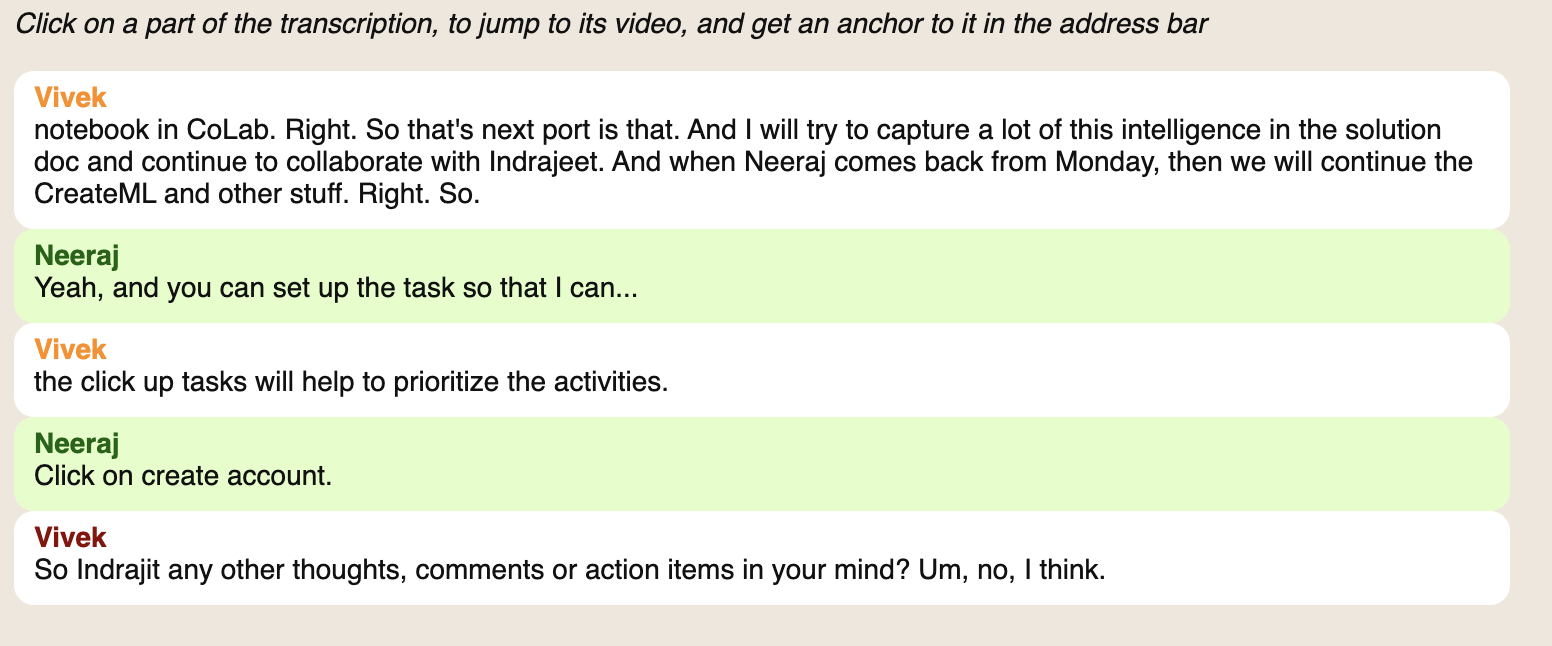

# Titanet Based Diarization

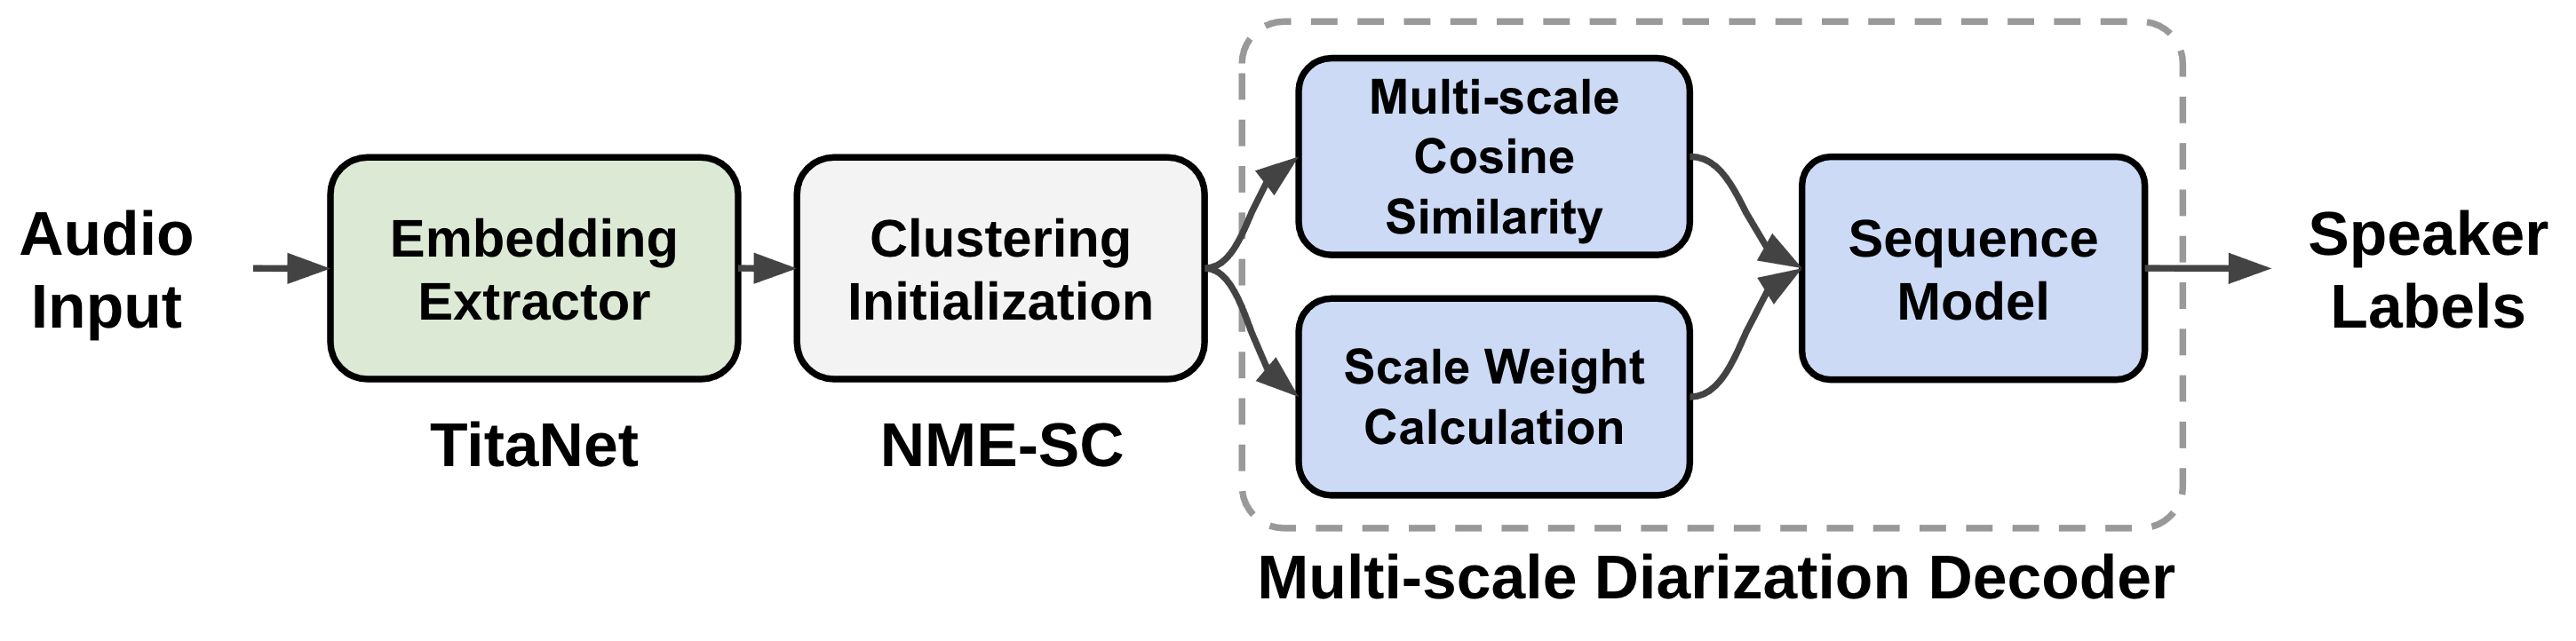

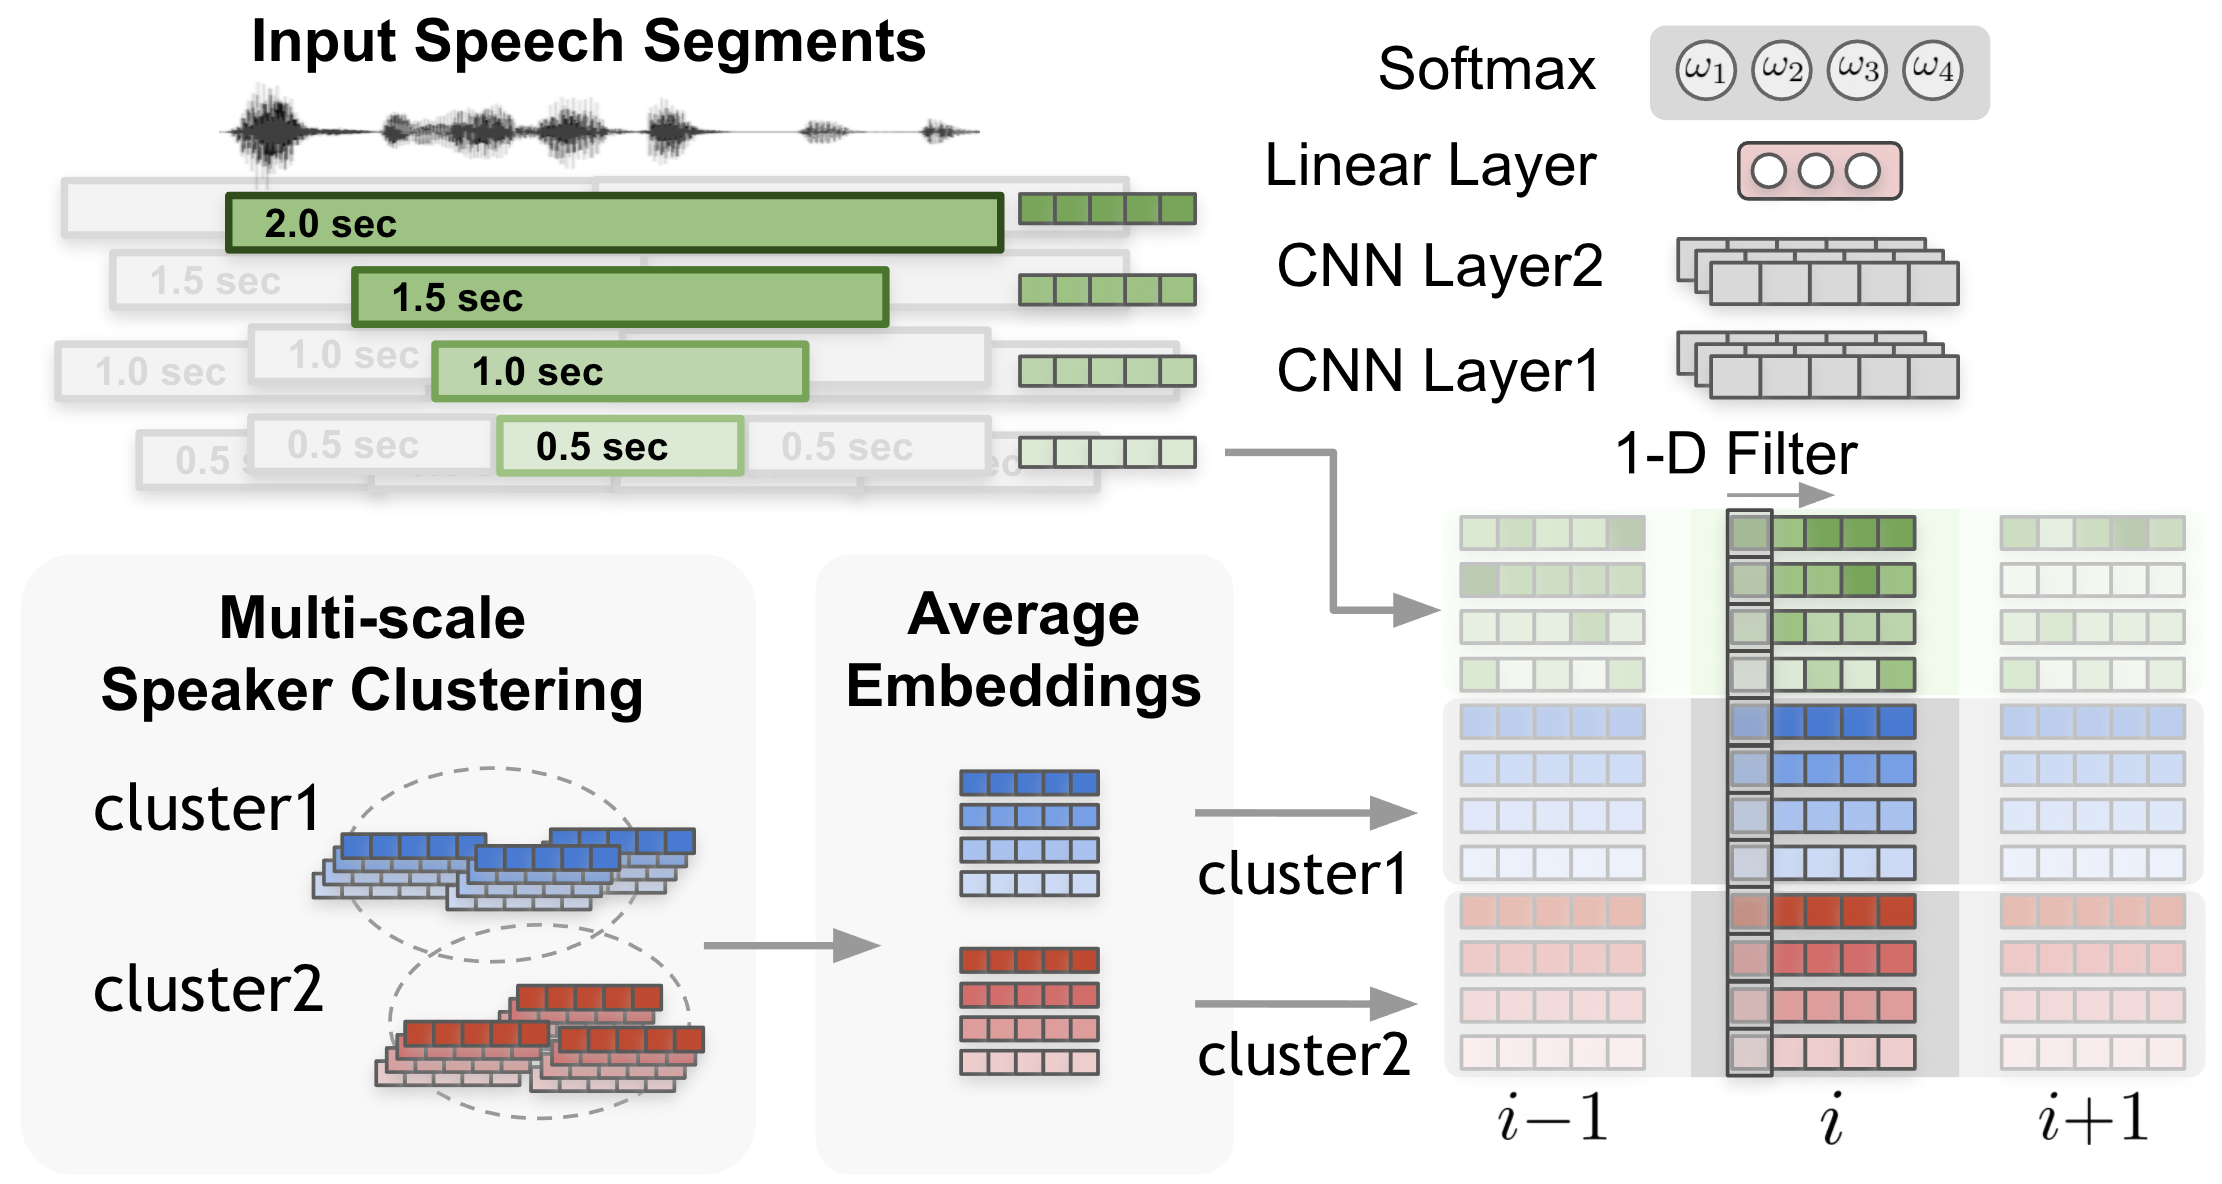

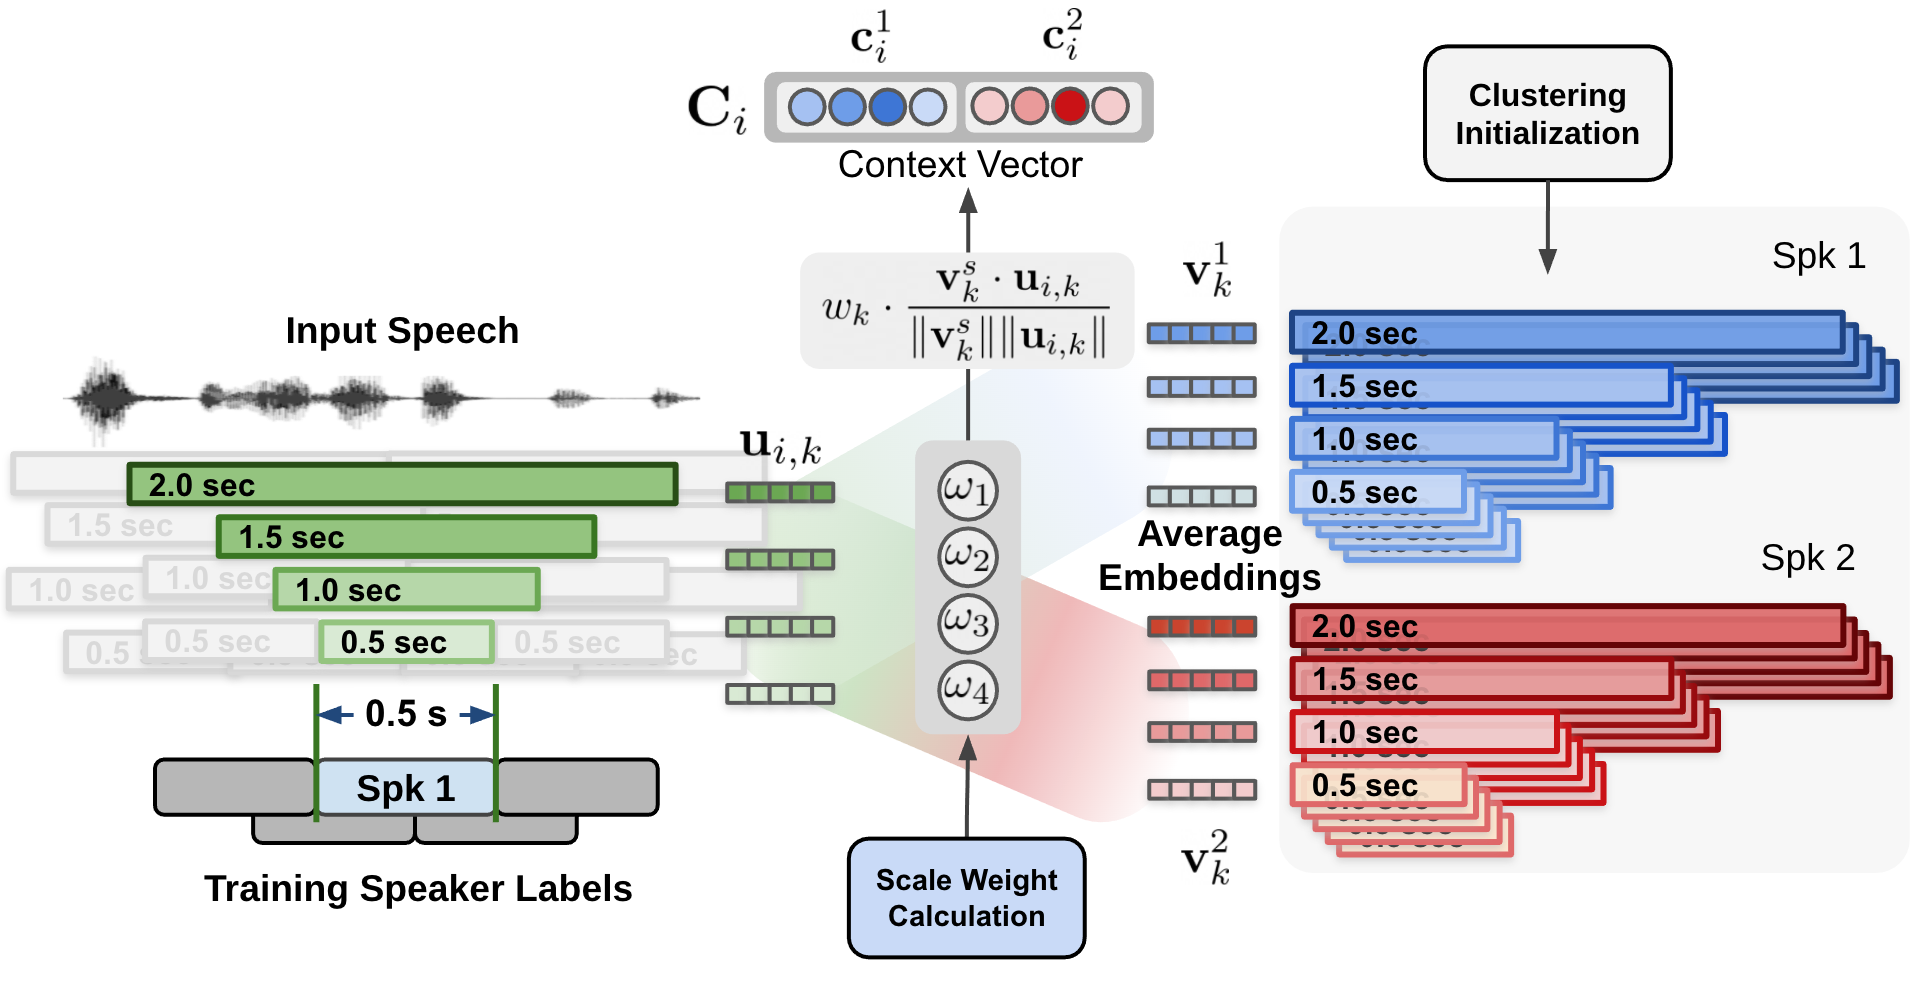

# Installing Dependencies

In [ ]:
from google.colab import drive
from pathlib import Path

drive_mount_path = Path("/content/drive")
drive.mount(str(drive_mount_path))
drive_mount_path /= "MyDrive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@markdown Enter the URL of the YouTube video, or the path to the video/audio file you want to transcribe, give the output path, and run the cell. HTML file is generated only for YouTube videos

Source = 'File (Google Drive)' #@param ['Youtube', 'File (Google Drive)']
#@markdown ---
#@markdown #### **Youtube video**
video_url = "https://youtu.be/NSp2fEQ6wyA" #@param {type:"string"}
#store_audio = True #@param {type:"boolean"}
#@markdown ---
#@markdown #### **Google Drive video or audio (mp4, wav)**
video_path = "/content/vocals.wav" #@param {type:"string"}
#@markdown ---
output_path = "/content/" #@param {type:"string"}
output_path = str(Path(output_path))
#@markdown ---
#@markdown **Run this cell again if you change the video.**


In [ ]:
!pip install torch==1.13.1+cu116 torchaudio==0.13.1+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

!pip install torchtext==0.14.1


!pip install nemo_toolkit[asr]==1.15.0
!pip install git+https://github.com/openai/whisper.git
!pip install git+https://github.com/m-bain/whisperX.git@4cb167a225c0ebaea127fd6049abfaa3af9f8bb4
!pip install git+https://github.com/facebookresearch/demucs#egg=demucs
!pip install deepmultilingualpunctuation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.21.2-py3-none-any.whl (4.7 MB)
  Using cached protobuf-3.20.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.26.1
    Uninstalling transformers-4.26.1:
      Successfully uninstalled transformers-4.26.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [ ]:
!pip install pytorch-lightning==1.8.6
!pip install transformers==4.26.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pytorch_lightning-1.8.6-py3-none-any.whl (800 kB)
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.6.5
    Uninstalling pytorch-lightning-1.6.5:
      Successfully uninstalled pytorch-lightning-1.6.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyannote-audio 2.1.1 requires pytorch-lightning<1.7,>=1.5.4, but you have pytorch-lightning 1.8.6 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.26.1-py3-none-any.whl (6.3 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.21.2
    Uninstalling transformers-4.21.2:
      Successfully uninstalled transformers-4.21.2


In [ ]:
import os
import wget
from omegaconf import OmegaConf
import json
import shutil
from whisper import load_model
import whisperx
import torch
import librosa
import soundfile
from nemo.collections.asr.models.msdd_models import NeuralDiarizer
from deepmultilingualpunctuation import PunctuationModel
import re

[NeMo W 2023-03-25 14:45:22 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2023-03-25 14:45:22 experimental:27] Module <class 'nemo.collections.asr.models.audio_to_audio_model.AudioToAudioModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2023-03-25 14:45:22 experimental:27] Module <class 'nemo.collections.asr.modules.audio_modules.SpectrogramToMultichannelFeatures'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2023-03-25 14:45:22 nemo_logging:349] /usr/local/lib/python3.9/dist-packages/torch/jit/annotations.py:309: UserWarning: TorchScript will treat type annotations of Tensor dtype-specific subtypes as if they are normal Tensors. dtype constraints are not enforced in compilation either.
      warnings.warn("TorchScript will treat type annotations of Tensor "
    
[NeMo W 2023-03-25 14:45:22 experimental:27] Module <class 'n

# Helper Functions

In [ ]:
def create_config():
    data_dir = "./"
    DOMAIN_TYPE = "telephonic"  # Can be meeting or telephonic based on domain type of the audio file
    CONFIG_FILE_NAME = f"diar_infer_{DOMAIN_TYPE}.yaml"
    CONFIG_URL = f"https://raw.githubusercontent.com/NVIDIA/NeMo/main/examples/speaker_tasks/diarization/conf/inference/{CONFIG_FILE_NAME}"
    MODEL_CONFIG = os.path.join(data_dir, CONFIG_FILE_NAME)
    if not os.path.exists(MODEL_CONFIG):
        MODEL_CONFIG = wget.download(CONFIG_URL, data_dir)

    config = OmegaConf.load(MODEL_CONFIG)

    ROOT = os.getcwd()
    data_dir = os.path.join(ROOT, "data")
    os.makedirs(data_dir, exist_ok=True)

    meta = {
        "audio_filepath": "mono_file.wav",
        "offset": 0,
        "duration": None,
        "label": "infer",
        "text": "-",
        "rttm_filepath": None,
        "uem_filepath": None,
    }
    with open("data/input_manifest.json", "w") as fp:
        json.dump(meta, fp)
        fp.write("\n")

    pretrained_vad = "vad_multilingual_marblenet"
    pretrained_speaker_model = "titanet_large"

    config.num_workers = 1  # Workaround for multiprocessing hanging with ipython issue

    output_dir = "nemo_outputs"  # os.path.join(ROOT, 'outputs')
    os.makedirs(output_dir, exist_ok=True)
    config.diarizer.manifest_filepath = "data/input_manifest.json"
    config.diarizer.out_dir = (
        output_dir  # Directory to store intermediate files and prediction outputs
    )

    config.diarizer.speaker_embeddings.model_path = pretrained_speaker_model
    config.diarizer.oracle_vad = (
        False  # compute VAD provided with model_path to vad config
    )
    config.diarizer.clustering.parameters.oracle_num_speakers = False

    # Here, we use our in-house pretrained NeMo VAD model
    config.diarizer.vad.model_path = pretrained_vad
    config.diarizer.vad.parameters.onset = 0.8
    config.diarizer.vad.parameters.offset = 0.6
    config.diarizer.vad.parameters.pad_offset = -0.05
    config.diarizer.msdd_model.model_path = (
        "diar_msdd_telephonic"  # Telephonic speaker diarization model
    )

    return config


def get_word_ts_anchor(s, e, option="start"):
    if option == "end":
        return e
    elif option == "mid":
        return (s + e) / 2
    return s


def get_words_speaker_mapping(wrd_ts, spk_ts, word_anchor_option="start"):
    s, e, sp = spk_ts[0]
    wrd_pos, turn_idx = 0, 0
    wrd_spk_mapping = []
    for wrd_dict in wrd_ts:
        ws, we, wrd = (
            int(wrd_dict["start"] * 1000),
            int(wrd_dict["end"] * 1000),
            wrd_dict["text"],
        )
        wrd_pos = get_word_ts_anchor(ws, we, word_anchor_option)
        while wrd_pos > float(e):
            turn_idx += 1
            turn_idx = min(turn_idx, len(spk_ts) - 1)
            s, e, sp = spk_ts[turn_idx]
            if turn_idx == len(spk_ts) - 1:
                e = get_word_ts_anchor(ws, we, option="end")
        wrd_spk_mapping.append(
            {"word": wrd, "start_time": ws, "end_time": we, "speaker": sp}
        )
    return wrd_spk_mapping


sentence_ending_punctuations = ".?!"


def get_first_word_idx_of_sentence(word_idx, word_list, speaker_list, max_words):
    is_word_sentence_end = (
        lambda x: x >= 0 and word_list[x][-1] in sentence_ending_punctuations
    )
    left_idx = word_idx
    while (
        left_idx > 0
        and word_idx - left_idx < max_words
        and speaker_list[left_idx - 1] == speaker_list[left_idx]
        and not is_word_sentence_end(left_idx - 1)
    ):
        left_idx -= 1

    return left_idx if left_idx == 0 or is_word_sentence_end(left_idx - 1) else -1


def get_last_word_idx_of_sentence(word_idx, word_list, max_words):
    is_word_sentence_end = (
        lambda x: x >= 0 and word_list[x][-1] in sentence_ending_punctuations
    )
    right_idx = word_idx
    while (
        right_idx < len(word_list)
        and right_idx - word_idx < max_words
        and not is_word_sentence_end(right_idx)
    ):
        right_idx += 1

    return (
        right_idx
        if right_idx == len(word_list) - 1 or is_word_sentence_end(right_idx)
        else -1
    )


def get_realigned_ws_mapping_with_punctuation(
    word_speaker_mapping, max_words_in_sentence=50
):
    is_word_sentence_end = (
        lambda x: x >= 0
        and word_speaker_mapping[x]["word"][-1] in sentence_ending_punctuations
    )
    wsp_len = len(word_speaker_mapping)

    words_list, speaker_list = [], []
    for k, line_dict in enumerate(word_speaker_mapping):
        word, speaker = line_dict["word"], line_dict["speaker"]
        words_list.append(word)
        speaker_list.append(speaker)

    k = 0
    while k < len(word_speaker_mapping):
        line_dict = word_speaker_mapping[k]
        if (
            k < wsp_len - 1
            and speaker_list[k] != speaker_list[k + 1]
            and not is_word_sentence_end(k)
        ):
            left_idx = get_first_word_idx_of_sentence(
                k, words_list, speaker_list, max_words_in_sentence
            )
            right_idx = (
                get_last_word_idx_of_sentence(
                    k, words_list, max_words_in_sentence - k + left_idx - 1
                )
                if left_idx > -1
                else -1
            )
            if min(left_idx, right_idx) == -1:
                k += 1
                continue

            spk_labels = speaker_list[left_idx : right_idx + 1]
            mod_speaker = max(set(spk_labels), key=spk_labels.count)
            if spk_labels.count(mod_speaker) < len(spk_labels) // 2:
                k += 1
                continue

            speaker_list[left_idx : right_idx + 1] = [mod_speaker] * (
                right_idx - left_idx + 1
            )
            k = right_idx

        k += 1

    k, realigned_list = 0, []
    while k < len(word_speaker_mapping):
        line_dict = word_speaker_mapping[k].copy()
        line_dict["speaker"] = speaker_list[k]
        realigned_list.append(line_dict)
        k += 1

    return realigned_list


def get_sentences_speaker_mapping(word_speaker_mapping, spk_ts):
    s, e, spk = spk_ts[0]
    prev_spk = spk

    snts = []
    snt = {"speaker": f"Speaker {spk}", "start_time": s, "end_time": e, "text": ""}

    for wrd_dict in word_speaker_mapping:
        wrd, spk = wrd_dict["word"], wrd_dict["speaker"]
        s, e = wrd_dict["start_time"], wrd_dict["end_time"]
        if spk != prev_spk:
            snts.append(snt)
            snt = {
                "speaker": f"Speaker {spk}",
                "start_time": s,
                "end_time": e,
                "text": "",
            }
        else:
            snt["end_time"] = e
        snt["text"] += wrd + " "
        prev_spk = spk

    snts.append(snt)
    return snts


def get_speaker_aware_transcript(sentences_speaker_mapping, f):
    for sentence_dict in sentences_speaker_mapping:
        sp = sentence_dict["speaker"]
        text = sentence_dict["text"]
        f.write(f"\n\n{sp}: {text}")


def format_timestamp(
    milliseconds: float, always_include_hours: bool = False, decimal_marker: str = "."
):
    assert milliseconds >= 0, "non-negative timestamp expected"

    hours = milliseconds // 3_600_000
    milliseconds -= hours * 3_600_000

    minutes = milliseconds // 60_000
    milliseconds -= minutes * 60_000

    seconds = milliseconds // 1_000
    milliseconds -= seconds * 1_000

    hours_marker = f"{hours:02d}:" if always_include_hours or hours > 0 else ""
    return (
        f"{hours_marker}{minutes:02d}:{seconds:02d}{decimal_marker}{milliseconds:03d}"
    )


def write_srt(transcript, file):
    """
    Write a transcript to a file in SRT format.
    """
    for i, segment in enumerate(transcript, start=1):
        # write srt lines
        print(
            f"{i}\n"
            f"{format_timestamp(segment['start_time'], always_include_hours=True, decimal_marker=',')} --> "
            f"{format_timestamp(segment['end_time'], always_include_hours=True, decimal_marker=',')}\n"
            f"{segment['speaker']}: {segment['text'].strip().replace('-->', '->')}\n",
            file=file,
            flush=True,
        )


def cleanup(path: str):
    """path could either be relative or absolute."""
    # check if file or directory exists
    if os.path.isfile(path) or os.path.islink(path):
        # remove file
        os.remove(path)
    elif os.path.isdir(path):
        # remove directory and all its content
        shutil.rmtree(path)
    else:
        raise ValueError("Path {} is not a file or dir.".format(path))

punct_model_langs = [
    "en",
    "fr",
    "de",
    "es",
    "it",
    "nl",
    "pt",
    "bg",
    "pl",
    "cs",
    "sk",
    "sl",
]
wav2vec2_langs = [
    "en",
    "fr",
    "de",
    "es",
    "it",
    "nl",
    "pt",
    "ja",
    "zh",
    "uk",
    "pt",
    "ar",
    "ru",
    "pl",
    "hu",
    "fi",
    "fa",
    "el",
    "tr",
]

# Options

In [ ]:
# Name of the audio file
audio_path = '9d54248d-60f5-4661-97d1-88b23568b2db.mp3'

# Whether to enable music removal from speech, helps increase diarization quality but uses alot of ram
enable_stemming = True

# (choose from 'tiny.en', 'tiny', 'base.en', 'base', 'small.en', 'small', 'medium.en', 'medium', 'large-v1', 'large-v2', 'large')
whisper_model_name = 'medium.en'

# Processing

## Separating music from speech using Demucs

---

By isolating the vocals from the rest of the audio, it becomes easier to identify and track individual speakers based on the spectral and temporal characteristics of their speech signals. Source separation is just one of many techniques that can be used as a preprocessing step to help improve the accuracy and reliability of the overall diarization process.

In [ ]:
import os 
if enable_stemming:
    # Isolate vocals from the rest of the audio

    return_code = os.system(
        f'python3 -m demucs.separate -n htdemucs_ft --two-stems=vocals "{video_path}" -o "temp_outputs"'
    )

    if return_code != 0:
        print(
            "Source splitting failed, using original audio file."
        )
        vocal_target = video_path
    else:
        vocal_target = f"{video_path[:-4]}/vocals.wav"
else:
    vocal_target = video_path

## Transcriping audio using Whisper and realligning timestamps using Wav2Vec2
---
This code uses two different open-source models to transcribe speech and perform forced alignment on the resulting transcription.

The first model is called OpenAI Whisper, which is a speech recognition model that can transcribe speech with high accuracy. The code loads the whisper model and uses it to transcribe the vocal_target file.

The output of the transcription process is a set of text segments with corresponding timestamps indicating when each segment was spoken.

The second model used is called wav2vec2, which is a large-scale neural network that is designed to learn representations of speech that are useful for a variety of speech processing tasks, including speech recognition and alignment.

The code loads the wav2vec2 alignment model and uses it to align the transcription segments with the original audio signal contained in the vocal_target file. This process involves finding the exact timestamps in the audio signal where each segment was spoken and aligning the text accordingly.

By combining the outputs of the two models, the code produces a fully aligned transcription of the speech contained in the vocal_target file. This aligned transcription can be useful for a variety of speech processing tasks, such as speaker diarization, sentiment analysis, and language identification.

In [ ]:
# Large models result in considerably better and more aligned (words, timestamps) mapping.
whisper_model = load_model(whisper_model_name)
whisper_results = whisper_model.transcribe(vocal_target, beam_size=None, verbose=False)

# clear gpu vram
del whisper_model
torch.cuda.empty_cache()

device = "cpu"
alignment_model, metadata = whisperx.load_align_model(
    language_code=whisper_results["language"], device=device
)
result_aligned = whisperx.align(
    whisper_results["segments"], alignment_model, metadata, vocal_target, device
)

# clear gpu vram
del alignment_model
torch.cuda.empty_cache()

[NeMo W 2023-03-25 15:29:58 nemo_logging:349] /usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
      warnings.warn("FP16 is not supported on CPU; using FP32 instead")
    
100%|██████████| 4368/4368 [01:42<00:00, 42.46frames/s]


## Convert audio to mono for NeMo combatibility

In [ ]:
signal, sample_rate = librosa.load(vocal_target, sr=None)
ROOT = os.getcwd()
temp_path = os.path.join(ROOT, "temp_outputs")
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
os.chdir(temp_path)
soundfile.write("mono_file.wav", signal, sample_rate, "PCM_24")

## Speaker Diarization using NeMo MSDD Model
---
This code uses a model called Nvidia NeMo MSDD (Multi-scale Diarization Decoder) to perform speaker diarization on an audio signal. Speaker diarization is the process of separating an audio signal into different segments based on who is speaking at any given time.

In [ ]:
# Initialize NeMo MSDD diarization model
msdd_model = NeuralDiarizer(cfg=create_config())
msdd_model.diarize()

del msdd_model
torch.cuda.empty_cache()

[NeMo I 2023-03-25 15:32:49 msdd_models:1081] Loading pretrained diar_msdd_telephonic model from NGC
[NeMo I 2023-03-25 15:32:49 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/diar_msdd_telephonic/versions/1.0.0/files/diar_msdd_telephonic.nemo to /root/.cache/torch/NeMo/NeMo_1.15.0/diar_msdd_telephonic/9c319f27168dc4980b8ba9a4ddd711bc/diar_msdd_telephonic.nemo
[NeMo I 2023-03-25 15:32:56 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-03-25 15:32:56 modelPT:156] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: null
    emb_dir: null
    sample_rate: 16000
    num_spks: 2
    soft_label_thres: 0.5
    labels: null
    batch_size: 15
    emb_batch_size: 0
    shuffle: true
    
[NeMo W 2023-03-25 15:32:56 modelPT:163] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: null
    emb_dir: null
    sample_rate: 16000
    num_spks: 2
    soft_label_thres: 0.5
    labels: null
    batch_size: 15
    emb_batch_size: 0
    shuffle: false
    
[NeMo W 2023-03-25 15:32:56 modelPT:169] Please call the ModelPT.setup_test_data() or ModelPT.setup_multiple

[NeMo I 2023-03-25 15:32:56 features:267] PADDING: 16
[NeMo I 2023-03-25 15:32:57 label_models:126] Setting angular: true/false in decoder is deprecated and will be removed in 1.13 version, use specific loss with _target_
[NeMo I 2023-03-25 15:32:57 features:267] PADDING: 16


ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE


[NeMo I 2023-03-25 15:32:58 save_restore_connector:243] Model EncDecDiarLabelModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.15.0/diar_msdd_telephonic/9c319f27168dc4980b8ba9a4ddd711bc/diar_msdd_telephonic.nemo.
[NeMo I 2023-03-25 15:32:58 label_models:126] Setting angular: true/false in decoder is deprecated and will be removed in 1.13 version, use specific loss with _target_
[NeMo I 2023-03-25 15:32:58 features:267] PADDING: 16
[NeMo I 2023-03-25 15:32:58 speaker_utils:92] Number of files to diarize: 1
[NeMo I 2023-03-25 15:32:58 clustering_diarizer:130] Loading pretrained vad_multilingual_marblenet model from NGC
[NeMo I 2023-03-25 15:32:58 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/vad_multilingual_marblenet/versions/1.10.0/files/vad_multilingual_marblenet.nemo to /root/.cache/torch/NeMo/NeMo_1.15.0/vad_multilingual_marblenet/670f425c7f186060b7a7268ba6dfacb2/vad_multilingual_marblenet.nemo
[NeMo I 2023-03-25 15:33:00 common:913] 

[NeMo W 2023-03-25 15:33:02 modelPT:156] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/ami_train_0.63.json,/manifests/freesound_background_train.json,/manifests/freesound_laughter_train.json,/manifests/fisher_2004_background.json,/manifests/fisher_2004_speech_sampled.json,/manifests/google_train_manifest.json,/manifests/icsi_all_0.63.json,/manifests/musan_freesound_train.json,/manifests/musan_music_train.json,/manifests/musan_soundbible_train.json,/manifests/mandarin_train_sample.json,/manifests/german_train_sample.json,/manifests/spanish_train_sample.json,/manifests/french_train_sample.json,/manifests/russian_train_sample.json
    sample_rate: 16000
    labels:
    - background
    - speech
    batch_size: 256
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: sca

[NeMo I 2023-03-25 15:33:02 features:267] PADDING: 16
[NeMo I 2023-03-25 15:33:02 save_restore_connector:243] Model EncDecClassificationModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.15.0/vad_multilingual_marblenet/670f425c7f186060b7a7268ba6dfacb2/vad_multilingual_marblenet.nemo.
[NeMo I 2023-03-25 15:33:02 msdd_models:855] Multiscale Weights: [1, 1, 1, 1, 1]
[NeMo I 2023-03-25 15:33:02 msdd_models:856] Clustering Parameters: {
        "oracle_num_speakers": false,
        "max_num_speakers": 8,
        "enhanced_count_thres": 80,
        "max_rp_threshold": 0.25,
        "sparse_search_volume": 30,
        "maj_vote_spk_count": false
    }
[NeMo I 2023-03-25 15:33:02 speaker_utils:92] Number of files to diarize: 1
[NeMo I 2023-03-25 15:33:02 clustering_diarizer:304] Split long audio file to avoid CUDA memory issue


splitting manifest: 100%|██████████| 1/1 [00:06<00:00,  6.17s/it]

[NeMo I 2023-03-25 15:33:08 classification_models:263] Perform streaming frame-level VAD
[NeMo I 2023-03-25 15:33:08 collections:298] Filtered duration for loading collection is 0.000000.
[NeMo I 2023-03-25 15:33:08 collections:301] Dataset loaded with 1 items, total duration of  0.01 hours.
[NeMo I 2023-03-25 15:33:08 collections:303] # 1 files loaded accounting to # 1 labels



vad:   0%|          | 0/1 [00:00<?, ?it/s][NeMo W 2023-03-25 15:33:10 nemo_logging:349] /usr/local/lib/python3.9/dist-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
      warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
    
vad: 100%|██████████| 1/1 [00:05<00:00,  5.90s/it]

[NeMo I 2023-03-25 15:33:14 clustering_diarizer:247] Generating predictions with overlapping input segments


[NeMo I 2023-03-25 15:33:15 clustering_diarizer:259] Converting frame level prediction to speech/no-speech segment in start and end times format.


creating speech segments: 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]

[NeMo I 2023-03-25 15:33:15 clustering_diarizer:282] Subsegmentation for embedding extraction: scale0, nemo_outputs/speaker_outputs/subsegments_scale0.json
[NeMo I 2023-03-25 15:33:15 clustering_diarizer:337] Extracting embeddings for Diarization
[NeMo I 2023-03-25 15:33:15 collections:298] Filtered duration for loading collection is 0.000000.
[NeMo I 2023-03-25 15:33:15 collections:301] Dataset loaded with 33 items, total duration of  0.01 hours.
[NeMo I 2023-03-25 15:33:15 collections:303] # 33 files loaded accounting to # 1 labels



[1/5] extract embeddings: 100%|██████████| 1/1 [00:08<00:00,  8.40s/it]

[NeMo I 2023-03-25 15:33:24 clustering_diarizer:381] Saved embedding files to nemo_outputs/speaker_outputs/embeddings
[NeMo I 2023-03-25 15:33:24 clustering_diarizer:282] Subsegmentation for embedding extraction: scale1, nemo_outputs/speaker_outputs/subsegments_scale1.json
[NeMo I 2023-03-25 15:33:24 clustering_diarizer:337] Extracting embeddings for Diarization
[NeMo I 2023-03-25 15:33:24 collections:298] Filtered duration for loading collection is 0.000000.
[NeMo I 2023-03-25 15:33:24 collections:301] Dataset loaded with 36 items, total duration of  0.01 hours.
[NeMo I 2023-03-25 15:33:24 collections:303] # 36 files loaded accounting to # 1 labels



[2/5] extract embeddings: 100%|██████████| 1/1 [00:08<00:00,  8.50s/it]

[NeMo I 2023-03-25 15:33:32 clustering_diarizer:381] Saved embedding files to nemo_outputs/speaker_outputs/embeddings
[NeMo I 2023-03-25 15:33:32 clustering_diarizer:282] Subsegmentation for embedding extraction: scale2, nemo_outputs/speaker_outputs/subsegments_scale2.json
[NeMo I 2023-03-25 15:33:32 clustering_diarizer:337] Extracting embeddings for Diarization
[NeMo I 2023-03-25 15:33:32 collections:298] Filtered duration for loading collection is 0.000000.
[NeMo I 2023-03-25 15:33:32 collections:301] Dataset loaded with 41 items, total duration of  0.01 hours.
[NeMo I 2023-03-25 15:33:32 collections:303] # 41 files loaded accounting to # 1 labels



[3/5] extract embeddings: 100%|██████████| 1/1 [00:06<00:00,  6.26s/it]

[NeMo I 2023-03-25 15:33:38 clustering_diarizer:381] Saved embedding files to nemo_outputs/speaker_outputs/embeddings
[NeMo I 2023-03-25 15:33:38 clustering_diarizer:282] Subsegmentation for embedding extraction: scale3, nemo_outputs/speaker_outputs/subsegments_scale3.json
[NeMo I 2023-03-25 15:33:38 clustering_diarizer:337] Extracting embeddings for Diarization
[NeMo I 2023-03-25 15:33:38 collections:298] Filtered duration for loading collection is 0.000000.
[NeMo I 2023-03-25 15:33:38 collections:301] Dataset loaded with 50 items, total duration of  0.01 hours.
[NeMo I 2023-03-25 15:33:38 collections:303] # 50 files loaded accounting to # 1 labels



[4/5] extract embeddings: 100%|██████████| 1/1 [00:08<00:00,  8.37s/it]

[NeMo I 2023-03-25 15:33:47 clustering_diarizer:381] Saved embedding files to nemo_outputs/speaker_outputs/embeddings
[NeMo I 2023-03-25 15:33:47 clustering_diarizer:282] Subsegmentation for embedding extraction: scale4, nemo_outputs/speaker_outputs/subsegments_scale4.json
[NeMo I 2023-03-25 15:33:47 clustering_diarizer:337] Extracting embeddings for Diarization


[NeMo I 2023-03-25 15:33:47 collections:298] Filtered duration for loading collection is 0.000000.
[NeMo I 2023-03-25 15:33:47 collections:301] Dataset loaded with 76 items, total duration of  0.01 hours.
[NeMo I 2023-03-25 15:33:47 collections:303] # 76 files loaded accounting to # 1 labels


[5/5] extract embeddings: 100%|██████████| 2/2 [00:08<00:00,  4.20s/it]

[NeMo I 2023-03-25 15:33:55 clustering_diarizer:381] Saved embedding files to nemo_outputs/speaker_outputs/embeddings



[NeMo W 2023-03-25 15:33:55 speaker_utils:428] cuda=False, using CPU for eigen decomposition. This might slow down the clustering process.
clustering: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]
[NeMo W 2023-03-25 15:33:56 der:105] Check if each ground truth RTTMs were present in the provided manifest file. Skipping calculation of Diariazation Error Rate


[NeMo I 2023-03-25 15:33:56 clustering_diarizer:456] Outputs are saved in /content/temp_outputs/nemo_outputs directory
[NeMo I 2023-03-25 15:33:56 msdd_models:951] Loading embedding pickle file of scale:0 at nemo_outputs/speaker_outputs/embeddings/subsegments_scale0_embeddings.pkl
[NeMo I 2023-03-25 15:33:56 msdd_models:951] Loading embedding pickle file of scale:1 at nemo_outputs/speaker_outputs/embeddings/subsegments_scale1_embeddings.pkl
[NeMo I 2023-03-25 15:33:56 msdd_models:951] Loading embedding pickle file of scale:2 at nemo_outputs/speaker_outputs/embeddings/subsegments_scale2_embeddings.pkl
[NeMo I 2023-03-25 15:33:56 msdd_models:951] Loading embedding pickle file of scale:3 at nemo_outputs/speaker_outputs/embeddings/subsegments_scale3_embeddings.pkl
[NeMo I 2023-03-25 15:33:56 msdd_models:951] Loading embedding pickle file of scale:4 at nemo_outputs/speaker_outputs/embeddings/subsegments_scale4_embeddings.pkl
[NeMo I 2023-03-25 15:33:56 msdd_models:929] Loading cluster label

100%|██████████| 1/1 [00:00<00:00, 13.01it/s]

[NeMo I 2023-03-25 15:33:56 msdd_models:1393]      [Threshold: 0.7000] [use_clus_as_main=False] [diar_window=50]
[NeMo I 2023-03-25 15:33:56 speaker_utils:92] Number of files to diarize: 1



[NeMo W 2023-03-25 15:33:56 der:105] Check if each ground truth RTTMs were present in the provided manifest file. Skipping calculation of Diariazation Error Rate


[NeMo I 2023-03-25 15:33:56 speaker_utils:92] Number of files to diarize: 1


[NeMo W 2023-03-25 15:33:56 der:105] Check if each ground truth RTTMs were present in the provided manifest file. Skipping calculation of Diariazation Error Rate


[NeMo I 2023-03-25 15:33:56 speaker_utils:92] Number of files to diarize: 1


[NeMo W 2023-03-25 15:33:56 der:105] Check if each ground truth RTTMs were present in the provided manifest file. Skipping calculation of Diariazation Error Rate


[NeMo I 2023-03-25 15:33:56 msdd_models:1414]   
    


## Mapping Spekers to Sentences According to Timestamps

In [ ]:
# Reading timestamps <> Speaker Labels mapping

output_dir = "nemo_outputs"

speaker_ts = []
with open(f"{output_dir}/pred_rttms/mono_file.rttm", "r") as f:
    lines = f.readlines()
    for line in lines:
        line_list = line.split(" ")
        s = int(float(line_list[5]) * 1000)
        e = s + int(float(line_list[8]) * 1000)
        speaker_ts.append([s, e, int(line_list[11].split("_")[-1])])

wsm = get_words_speaker_mapping(result_aligned["word_segments"], speaker_ts, "start")

## Realligning Speech segments using Punctuation
---

This code provides a method for disambiguating speaker labels in cases where a sentence is split between two different speakers. It uses punctuation markings to determine the dominant speaker for each sentence in the transcription.

```
Speaker A: It's got to come from somewhere else. Yeah, that one's also fun because you know the lows are
Speaker B: going to suck, right? So it's actually it hits you on both sides.
```

For example, if a sentence is split between two speakers, the code takes the mode of speaker labels for each word in the sentence, and uses that speaker label for the whole sentence. This can help to improve the accuracy of speaker diarization, especially in cases where the Whisper model may not take fine utterances like "hmm" and "yeah" into account, but the Diarization Model (Nemo) may include them, leading to inconsistent results.

The code also handles cases where one speaker is giving a monologue while other speakers are making occasional comments in the background. It ignores the comments and assigns the entire monologue to the speaker who is speaking the majority of the time. This provides a robust and reliable method for realigning speech segments to their respective speakers based on punctuation in the transcription.

In [ ]:
if whisper_results["language"] in punct_model_langs:
    # restoring punctuation in the transcript to help realign the sentences
    punct_model = PunctuationModel(model="kredor/punctuate-all")

    words_list = list(map(lambda x: x["word"], wsm))

    labled_words = punct_model.predict(words_list)

    ending_puncts = ".?!"
    model_puncts = ".,;:!?"

    # We don't want to punctuate U.S.A. with a period. Right?
    is_acronym = lambda x: re.fullmatch(r"\b(?:[a-zA-Z]\.){2,}", x)

    for word_dict, labeled_tuple in zip(wsm, labled_words):
        word = word_dict["word"]
        if (
            word
            and labeled_tuple[1] in ending_puncts
            and (word[-1] not in model_puncts or is_acronym(word))
        ):
            word += labeled_tuple[1]
            if word.endswith(".."):
                word = word.rstrip(".")
            word_dict["word"] = word

    

    wsm = get_realigned_ws_mapping_with_punctuation(wsm)
else:
    print(
        f'Punctuation restoration is not available for {whisper_results["language"]} language.'
    )

ssm = get_sentences_speaker_mapping(wsm, speaker_ts)

[NeMo W 2023-03-25 15:35:20 nemo_logging:349] /usr/local/lib/python3.9/dist-packages/transformers/pipelines/token_classification.py:159: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="none"` instead.
      warnings.warn(
    


## Cleanup and Exporing the results

In [ ]:
os.chdir(ROOT)  # back to parent dir
with open(f"{audio_path[:-4]}.txt", "w", encoding="utf-8-sig") as f:
    get_speaker_aware_transcript(ssm, f)

with open(f"{audio_path[:-4]}.srt", "w", encoding="utf-8-sig") as srt:
    write_srt(ssm, srt)

cleanup(temp_path)

## Emotion Detction


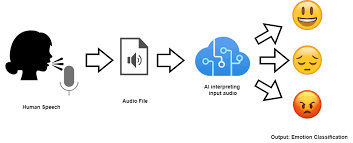

In [37]:
!pip install audonnx
!pip install audinterface
!pip install gTTs
!pip install audb
!pip install audmetric
!pip install opensmile
!pip install audplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os

import audeer


model_root = 'model'
cache_root = 'cache'


audeer.mkdir(cache_root)
def cache_path(file):
    return os.path.join(cache_root, file)


url = 'https://zenodo.org/record/6221127/files/w2v2-L-robust-12.6bc4a7fd-1.1.0.zip'
dst_path = cache_path('model.zip')

if not os.path.exists(dst_path):
    audeer.download_url(
        url, 
        dst_path, 
        verbose=True,
    )
    
if not os.path.exists(model_root):
    audeer.extract_archive(
        dst_path, 
        model_root, 
        verbose=True,
    )

In [6]:
import audonnx


model = audonnx.load(model_root)
model

Input:
  signal:
    shape: [1, -1]
    dtype: tensor(float)
    transform: None
Output:
  hidden_states:
    shape: [1, 1024]
    dtype: tensor(float)
    labels: [hidden_states-0, hidden_states-1, hidden_states-2, (...), hidden_states-1021,
      hidden_states-1022, hidden_states-1023]
  logits:
    shape: [1, 3]
    dtype: tensor(float)
    labels: [arousal, dominance, valence]

In [7]:
import numpy as np


np.random.seed(0)

sampling_rate = 16000
signal = np.random.normal(
    size=sampling_rate,
).astype(np.float32)

model(signal, sampling_rate)

{'hidden_states': array([[-0.00723587,  0.00645568, -0.00865647, ...,  0.00670633,
          0.00948439,  0.0028789 ]], dtype=float32),
 'logits': array([[0.6563389 , 0.63077086, 0.47623312]], dtype=float32)}

## Predict arousal, dominance and valence


In [12]:
import audinterface


interface = audinterface.Feature(
    model.labels('logits'),
    process_func=model,
    process_func_args={
        'outputs': 'logits',
    },
    sampling_rate=sampling_rate,
    resample=True,    
    verbose=True,
)

In [13]:
interface.process_signal(signal, sampling_rate)


,,arousal,dominance,valence
start,end,,,
0 days,0 days 00:00:01,0.656339,0.630771,0.476233


## Predict dimensional scores on synthetic files


In [16]:
import audiofile
import gtts
import IPython


sentences = [
    'This is a notebook',
    'This is wonderful',
    'This is stupid',
]

tts_files = []
for sentence in audeer.progress_bar(
    sentences,
    desc='Create files',
):
    tts_path = cache_path(f'{sentence}.mp3')
    tts_files.append(tts_path)
    if not os.path.exists(tts_path):
        tts = gtts.gTTS(sentence)
        tts.save(tts_path)

for tts_file in tts_files:    
    audio = IPython.display.Audio(tts_file)
    IPython.display.display(audio)

In [17]:
interface.process_files(tts_files).round(2)


,,,arousal,dominance,valence
file,start,end,,,
cache/This is a notebook.mp3,0 days,0 days 00:00:01.680000,0.52,0.58,0.55
cache/This is wonderful.mp3,0 days,0 days 00:00:01.728000,0.60,0.70,0.91
cache/This is stupid.mp3,0 days,0 days 00:00:01.704000,0.61,0.71,0.05


## Use embeddings to train categorical emotion model


In [24]:
import audb
import audformat


db = audb.load(
    'emodb',
    version='1.1.1',
    format='wav',
    mixdown=True,
    sampling_rate=16000,
    full_path=False,    
    cache_root=cache_root,
    verbose=True,
)
speaker = db['files']['speaker'].get()
emotion = db['emotion']['emotion'].get()

audformat.utils.concat([emotion, speaker])

Get:   emodb v1.1.1
Cache: /content/cache/emodb/1.1.1/fe182b91


,emotion,speaker
file,,
wav/03a01Fa.wav,happiness,3
wav/03a01Nc.wav,neutral,3
wav/03a01Wa.wav,anger,3
wav/03a02Fc.wav,happiness,3
wav/03a02Nc.wav,neutral,3
...,...,...
wav/16b10Lb.wav,boredom,16
wav/16b10Tb.wav,sadness,16
wav/16b10Td.wav,sadness,16


In [25]:
import pandas as pd


hidden_states = audinterface.Feature(
    model.labels('hidden_states'),
    process_func=model,
    process_func_args={
        'outputs': 'hidden_states',
    },
    sampling_rate=16000,    
    resample=True,    
    num_workers=5,
    verbose=True,
)

features_w2v2 = hidden_states.process_index(
    emotion.index,
    root=db.root,
    cache_root=audeer.path(cache_root, 'w2v2'),
)
features_w2v2

,,,hidden_states-0,hidden_states-1,hidden_states-2,hidden_states-3,hidden_states-4,hidden_states-5,hidden_states-6,hidden_states-7,hidden_states-8,hidden_states-9,...,hidden_states-1014,hidden_states-1015,hidden_states-1016,hidden_states-1017,hidden_states-1018,hidden_states-1019,hidden_states-1020,hidden_states-1021,hidden_states-1022,hidden_states-1023
file,start,end,,,,,,,,,,,,,,,,,,,,,
wav/03a01Fa.wav,0 days,0 days 00:00:01.898250,-0.007891,0.006736,-0.005898,-0.006566,-0.004559,-0.008148,0.168698,0.006812,0.113164,-0.001617,...,0.003587,0.011148,-0.050405,0.008359,0.034025,-0.064220,0.139168,0.007794,0.007637,0.006209
wav/03a01Nc.wav,0 days,0 days 00:00:01.611250,-0.007629,0.006001,-0.007628,-0.006588,-0.005104,-0.008472,0.199000,0.006391,0.071223,-0.001760,...,0.003145,0.011300,-0.018726,0.008156,0.015245,-0.056928,0.083291,0.007600,0.007721,0.005684
wav/03a01Wa.wav,0 days,0 days 00:00:01.877812500,-0.007874,0.006600,-0.008576,-0.007047,-0.004646,-0.008129,0.237001,0.007115,0.188141,-0.001287,...,0.003982,0.011190,-0.036640,0.008163,0.062221,-0.112500,0.302140,0.007813,0.007812,0.007133
wav/03a02Fc.wav,0 days,0 days 00:00:02.006250,-0.007407,0.006326,-0.010519,-0.005899,-0.004216,-0.007912,0.109786,0.006558,0.088926,-0.001507,...,0.003656,0.011320,-0.041450,0.008284,-0.010972,-0.139131,0.366497,0.007560,0.008487,0.004726
wav/03a02Nc.wav,0 days,0 days 00:00:01.439812500,-0.007313,0.006525,-0.010693,-0.004869,-0.004605,-0.008149,0.122609,0.006291,0.032912,-0.001508,...,0.003650,0.010983,-0.058476,0.008078,-0.008553,-0.000632,0.296581,0.007574,0.008161,0.005591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wav/16b10Lb.wav,0 days,0 days 00:00:03.442687500,-0.007212,0.006251,-0.006754,-0.006353,-0.004147,-0.007847,0.023312,0.007121,0.040396,-0.001996,...,0.003988,0.011588,-0.043439,0.008200,-0.027195,-0.063882,-0.051351,0.007314,0.007467,0.005633
wav/16b10Tb.wav,0 days,0 days 00:00:03.500625,-0.007274,0.006054,-0.006579,-0.006229,-0.004043,-0.005949,-0.005269,0.006985,-0.119985,-0.001811,...,0.003704,0.011652,-0.047649,0.008086,-0.013412,0.171493,-0.094538,0.007363,0.006186,0.005715
wav/16b10Td.wav,0 days,0 days 00:00:03.934187500,-0.007491,0.006536,-0.006867,-0.007232,-0.004012,-0.005708,-0.095532,0.006726,-0.191503,-0.002289,...,0.004344,0.011328,-0.064138,0.008109,-0.004145,0.111839,-0.037554,0.007447,0.006693,0.005184


In [26]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# create classifier and grouping object
clf = make_pipeline(
    StandardScaler(), 
    SVC(gamma='auto'),
)
logo = LeaveOneGroupOut()

def experiment(
    features,
    targets,
    groups,
):        
    truths = []
    preds = []
    
    # leave-one-speaker loop    
    pbar = audeer.progress_bar(
        total=len(groups.unique()),
        desc='Run experiment',
    )
    for train_index, test_index in logo.split(
        features, 
        targets, 
        groups=groups,
    ):
        train_x = features.iloc[train_index]
        train_y = targets[train_index]
        clf.fit(train_x, train_y)
        
        truth_x = features.iloc[test_index]
        truth_y = targets[test_index]
        predict_y = clf.predict(truth_x)
        
        truths.append(truth_y)
        preds.append(predict_y)
        
        pbar.update()
        
    # combine speaker folds
    truth = pd.concat(truths)
    truth.name = 'truth'
    pred = pd.Series(
        np.concatenate(preds),
        index=truth.index,
        name='prediction',
    )
    
    return truth, pred

In [27]:
truth_w2v2, pred_w2v2 = experiment(
    features_w2v2,
    emotion,
    speaker,
)
audformat.utils.concat([truth_w2v2, pred_w2v2])

,truth,prediction
file,,
wav/03a01Fa.wav,happiness,happiness
wav/03a01Nc.wav,neutral,neutral
wav/03a01Wa.wav,anger,anger
wav/03a02Fc.wav,happiness,happiness
wav/03a02Nc.wav,neutral,neutral
...,...,...
wav/16b10Lb.wav,boredom,boredom
wav/16b10Tb.wav,sadness,sadness
wav/16b10Td.wav,sadness,sadness


We measure performance by means of Unweighted Average Recall (UAR), which we calculate with audmetric.



In [30]:
import audmetric


audmetric.unweighted_average_recall(truth_w2v2, pred_w2v2)


0.9338131704157702

## Benchmark against hand-crafted features


A UAR of more than 93% looks encouraging. But are we actually better than a classic approach on hand-crafted feature? To find out, we repeat the previous experiment and use as input the ComParE feature set comprised of more than 6k functionals. To extract the feature set we use opensmile.

In [34]:
import opensmile


smile = opensmile.Smile(
    opensmile.FeatureSet.ComParE_2016,
    opensmile.FeatureLevel.Functionals,
    sampling_rate=16000,    
    resample=True,    
    num_workers=5,
    verbose=True,
)

features_smile = smile.process_index(
    emotion.index,
    root=db.root,
    cache_root=audeer.path(cache_root, 'smile'),    
)
features_smile

,,,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
file,start,end,,,,,,,,,,,,,,,,,,,,,
wav/03a01Fa.wav,0 days,0 days 00:00:01.898250,2.935072,0.203297,0.010989,0.295957,0.521095,1.027880,0.225138,0.506785,0.731923,0.036379,...,4.534245,0.369439,2.608829,2.575876,19.005924,0.681891,117.093933,56.662125,120.517212,53.837585
wav/03a01Nc.wav,0 days,0 days 00:00:01.611250,3.087914,0.155844,0.889610,0.230797,0.747830,1.160158,0.517033,0.412327,0.929361,0.039586,...,5.695178,0.373871,3.123539,3.173356,-18.526028,0.684225,126.975647,63.870255,157.944702,60.625206
wav/03a01Wa.wav,0 days,0 days 00:00:01.877812500,3.673083,0.677778,0.011111,0.379012,0.901301,1.801537,0.522289,0.900236,1.422525,0.027108,...,8.072537,0.486622,3.802572,3.807790,-19.999348,0.385978,177.820740,89.425529,153.756653,92.122215
wav/03a02Fc.wav,0 days,0 days 00:00:02.006250,3.149658,0.549223,0.720207,0.252871,0.691515,1.456156,0.438644,0.764641,1.203285,0.044348,...,8.049533,0.537332,3.237765,3.310604,-17.577114,0.442254,161.931686,82.129478,134.208984,73.309341
wav/03a02Nc.wav,0 days,0 days 00:00:01.439812500,2.437313,0.632353,0.691176,0.386229,0.809192,1.433426,0.422963,0.624234,1.047197,0.047513,...,6.743878,0.511177,2.217380,2.281038,-16.731733,0.492748,106.720039,57.315079,97.520103,41.168545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wav/16b10Lb.wav,0 days,0 days 00:00:03.442687500,3.308008,0.100890,0.014837,0.450570,0.805156,1.323949,0.354586,0.518794,0.873379,0.059215,...,8.917046,0.681655,2.385576,2.390011,-19.996981,0.537082,118.114395,65.305817,102.050064,44.002724
wav/16b10Tb.wav,0 days,0 days 00:00:03.500625,2.817487,0.104956,0.472303,0.298808,0.898184,1.372837,0.599376,0.474654,1.074030,0.111207,...,8.454210,0.531393,3.011052,3.035630,-19.587982,0.486605,133.106750,83.190590,112.855782,72.329666
wav/16b10Td.wav,0 days,0 days 00:00:03.934187500,1.854920,0.119171,0.000000,0.208670,0.607462,1.031825,0.398792,0.424362,0.823154,0.102642,...,6.234570,0.470659,2.219766,2.233577,-19.786058,0.620368,110.055237,51.608723,83.898209,39.287560


In [35]:
truth_smile, pred_smile = experiment(
    features_smile,
    emotion,
    speaker,
)
audmetric.unweighted_average_recall(truth_smile, pred_smile)

0.7707603332902749

To understand, on which classes we lose performance, we plot confusion matrices for both approaches with audplot. It is obvious that the handcrafted features mainly struggle with disgust and fear, but especially happiness (44%). The wav2vec 2.0 model performs better on all categories with an almost doubled recall for happiness - a huge step. We still have to note that 8% of the samples are confused with anger, a gap sentiment might close if the sentences were in English.



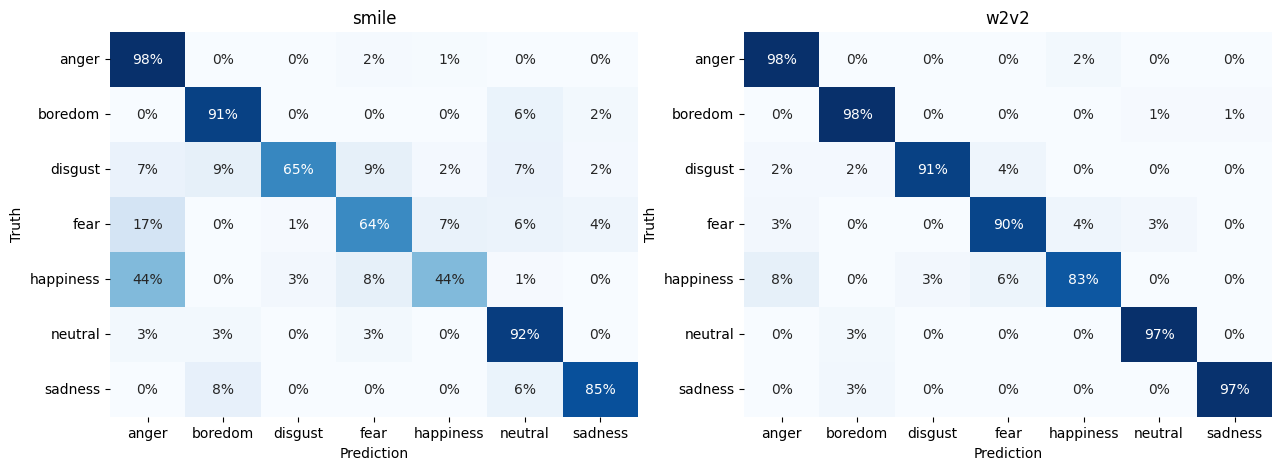

In [38]:
import audplot
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2, figsize=[15, 5])

axs[0].set_title('smile')
audplot.confusion_matrix(
    truth_smile, 
    pred_smile,
    percentage=True,    
    ax=axs[0],
)

axs[1].set_title('w2v2')
audplot.confusion_matrix(
    truth_w2v2, 
    pred_w2v2,
    percentage=True,
    ax=axs[1],
)